# Table of Contents

* [1. Librerias](#Librerias)
* [2. Exploratory Data Analysis](#EDA)
    * [2.1 Plots](#Plots)
        * [2.1.1 Plots en Pandas](#PlotsPandas)
        * [2.1.2 Section en Matplotlib](#PlotsMat)
        * [2.1.3 Section en Seaborn](#PlotsSeaborn)
* [3. Transformacion de Variables](#Transformacion)
    * [3.1 Normalizaciones y Reescalado](#Norm)
* [4. Features Selection](#Features)
* [5. Feature Importance](#Importance)
* [6. Model Validation](#Validation)
    * [6.1 Train Test Split](#TrainTest)
    * [6.2 KFolds](#KFolds)
    * [6.3 Leave One Out](#LOO)
    * [6.4 Shuffle Split](#Shuffle)
* [7. Metricas](#Metricas)
* [8. Seleccion de Algoritmos](#Seleccion)
* [9. Model Tuning](#Tuning)

## 1. Librerias <a class="anchor" id="Librerias"></a>

In [4]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis  <a class="anchor" id="EDA"></a>

In [12]:
data = pd.read_csv('C:/Users/Manuel/Documents/Master Big Data & Business Analytics/11-. Machine Learning con Python/1-. Documentación/Tema 2/breast_cancer_data.csv')
pd.options.display.max_columns = 999
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
data = data.drop(['id', 'Unnamed: 32'], axis = 1) #Tenemos que añadir "axis = 1" para que sepa que nos referimos a la culumnas

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [17]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [18]:
data.shape

(569, 31)

In [21]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [24]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

### 2.1 Plots  <a class="anchor" id="Plots"></a>

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
sns.set_style('darkgrid')

#### 2.1.1 Plots en Pandas   <a class="anchor" id="PlotsPandas"></a>

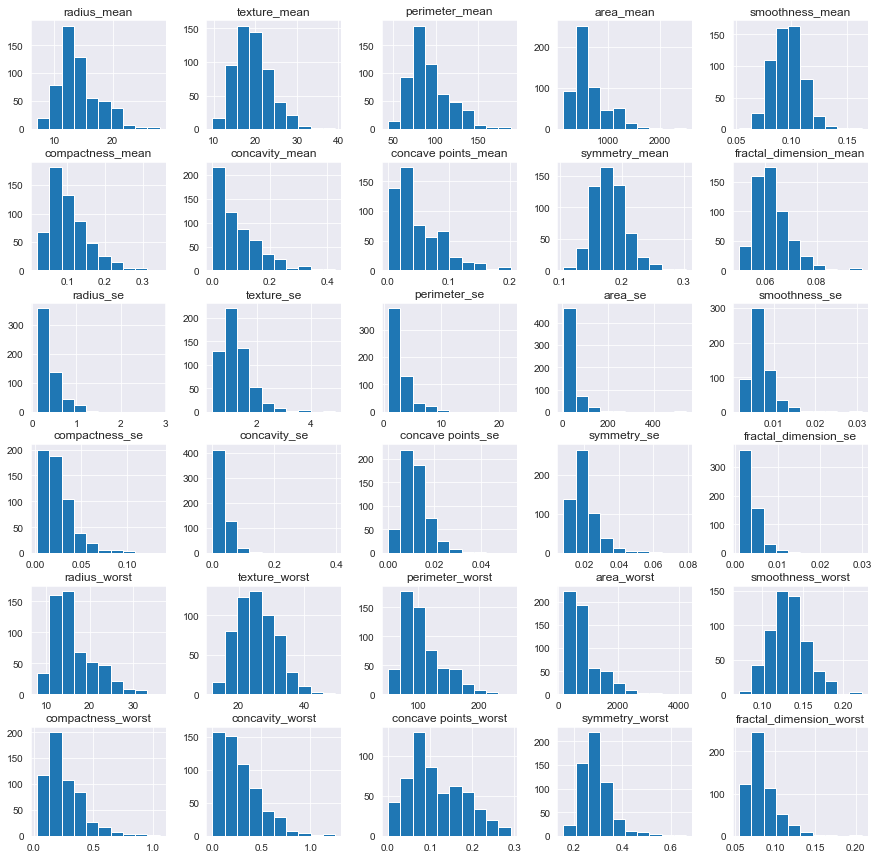

In [34]:
""" Histrogramas """

data.hist(figsize=(15,15))
plt.show()

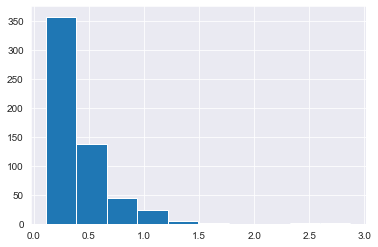

In [35]:
data.radius_se.hist()
plt.show()

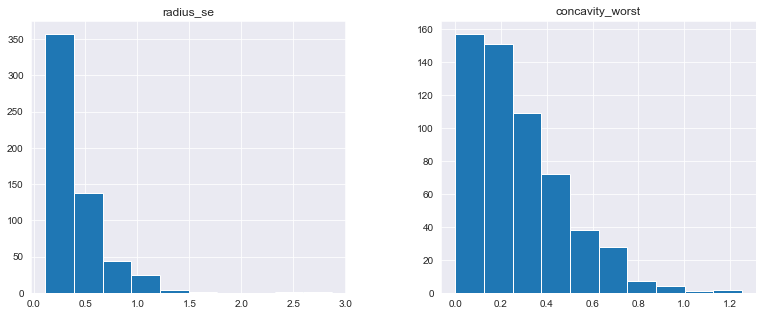

In [38]:
cols = ['radius_se', 'concavity_worst']

data[cols].hist(figsize=(13,5))
plt.show()

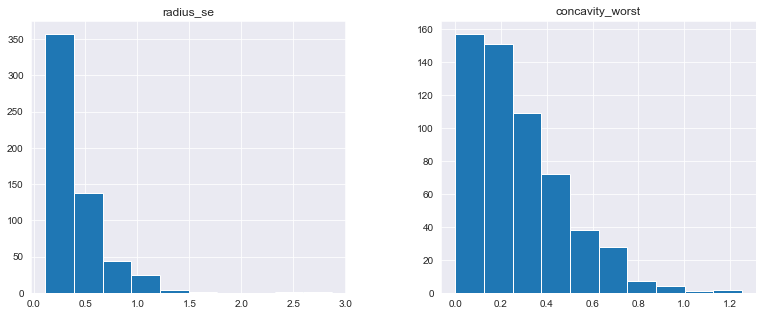

In [39]:
data[['radius_se', 'concavity_worst']].hist(figsize=(13,5)) # Ojo a los dobles corchetes
plt.show()

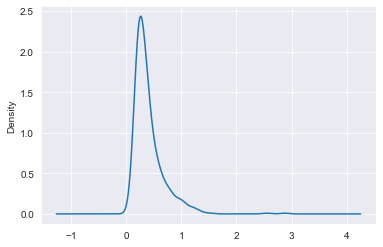

In [36]:
data.radius_se.plot(kind='density')
plt.show()

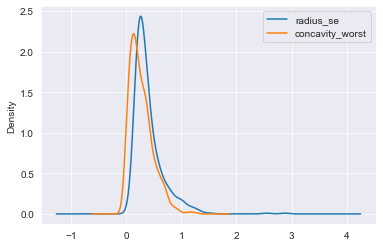

In [40]:
cols = ['radius_se', 'concavity_worst']

data[cols].plot(kind='density') #No Nos vale que se superpongan, mirar abajo
plt.show()

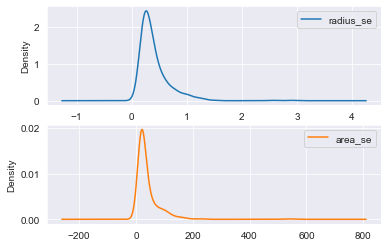

In [41]:
cols = ['radius_se', 'area_se']

data[cols].plot(kind='density', subplots=True, sharex=False) #Separa las graficas y que cada una siga con sus rango en eje x
plt.show()

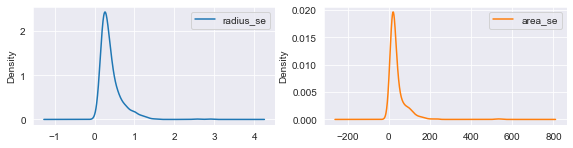

In [42]:
cols = ['radius_se', 'area_se']

data[cols].plot(kind='density', layout=(4,4), subplots=True, sharex=False, figsize=(20,10))
plt.show()

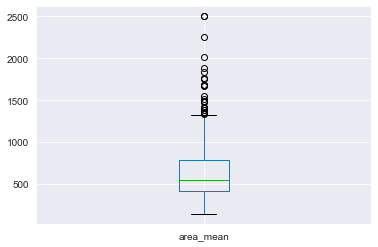

In [48]:
""" Boxplots """

data.boxplot('area_mean')
plt.show()

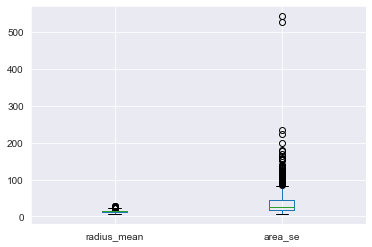

In [51]:
cols = ['radius_mean', 'area_se']

data.boxplot(cols)
plt.show()

###### Ejercicio: Bucle, 3 boxplots: 'area_mean', 'radius_mean', 'texture_mean'

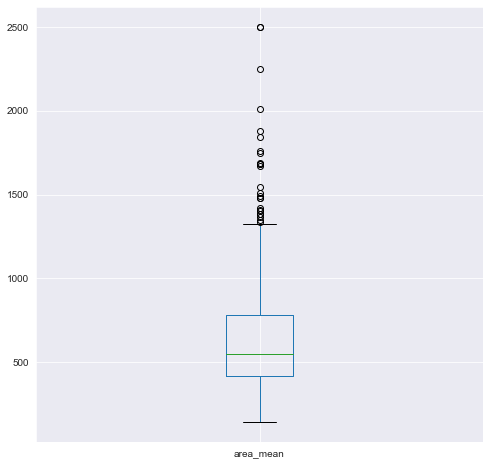

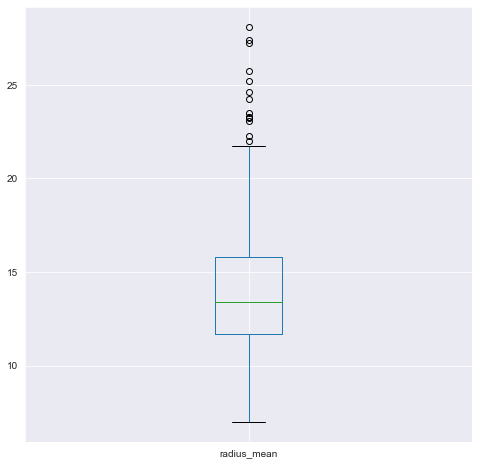

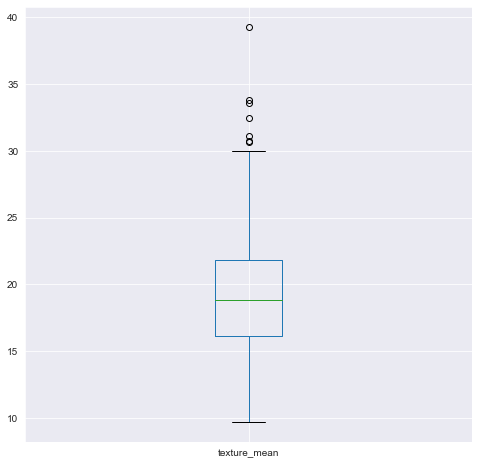

In [452]:
cols = ['area_mean', 'radius_mean', 'texture_mean']

for i in cols:
    data.boxplot(i, figsize=(8,8))
    plt.show()

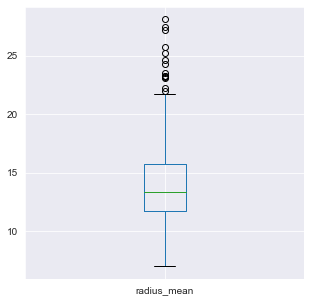

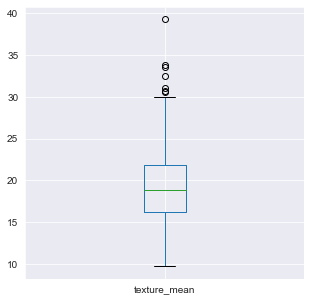

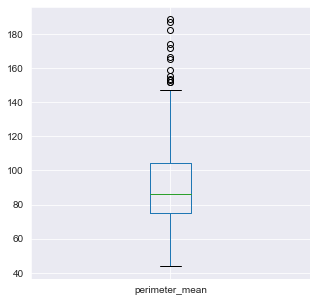

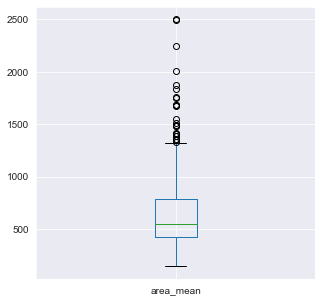

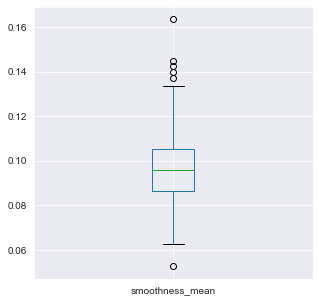

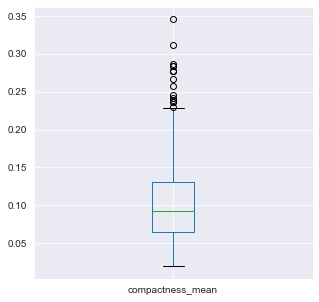

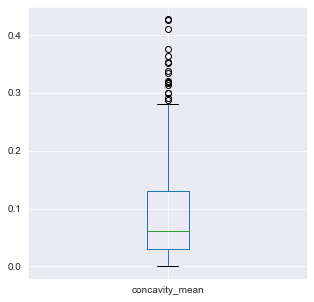

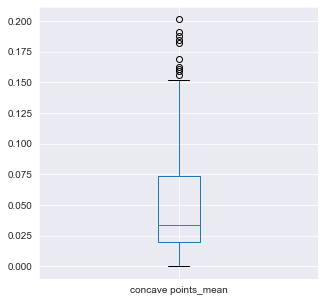

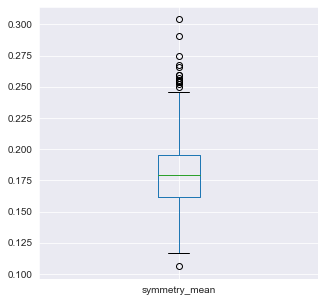

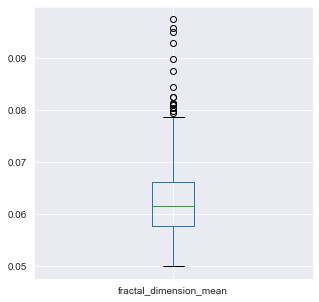

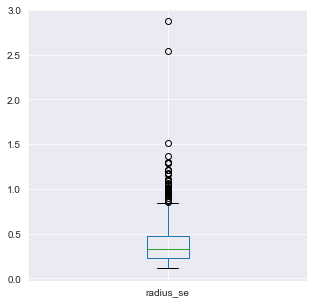

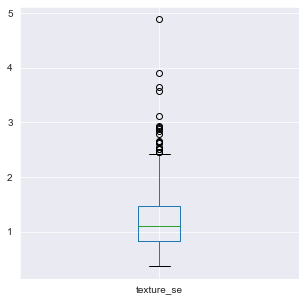

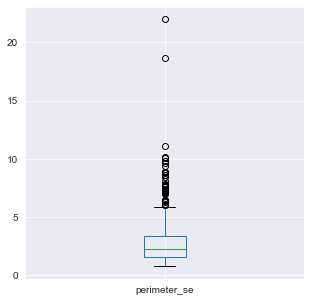

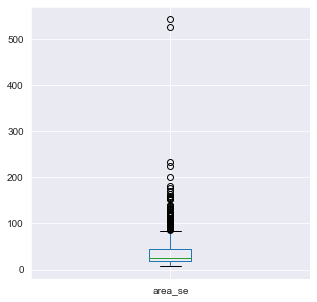

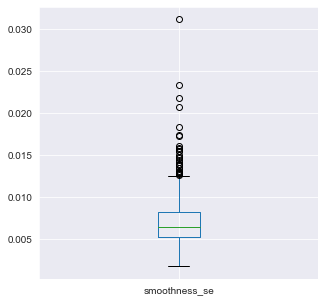

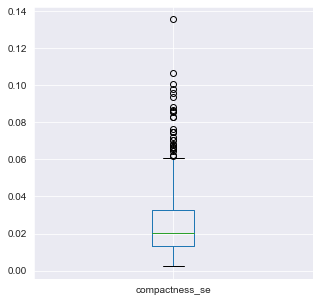

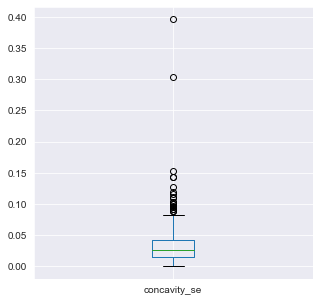

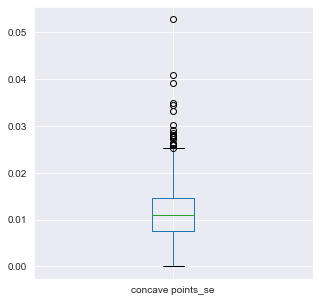

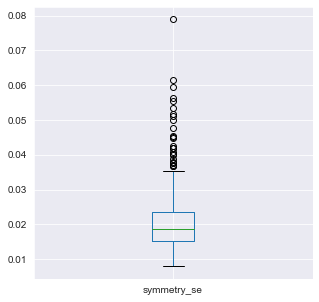

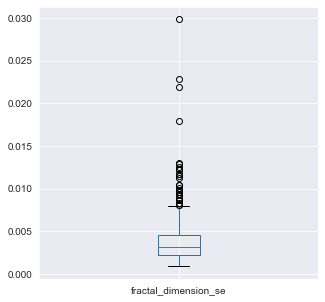

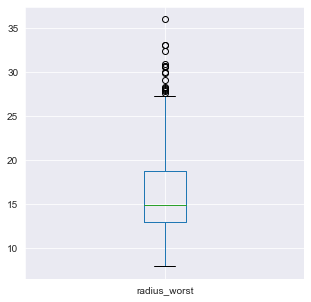

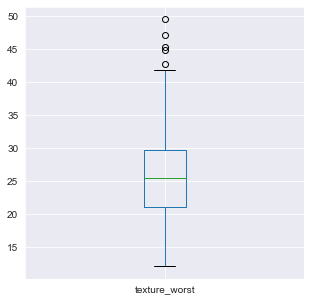

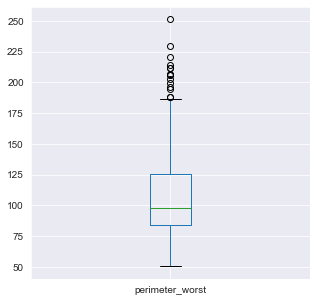

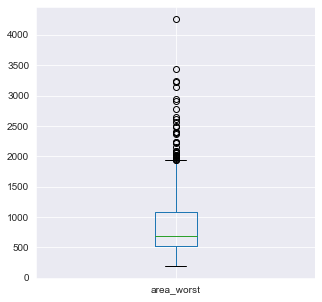

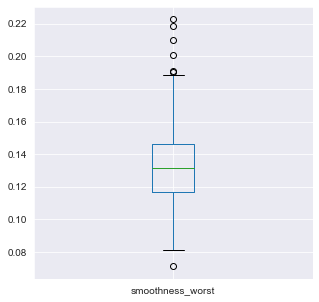

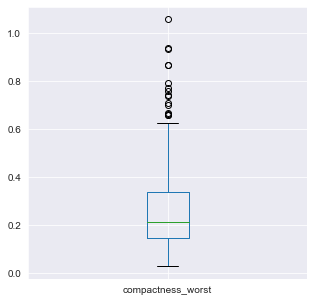

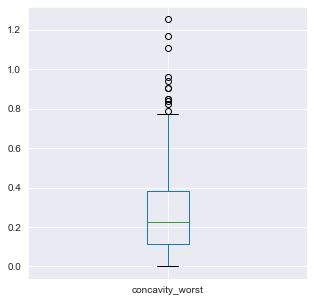

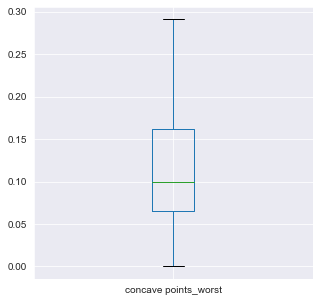

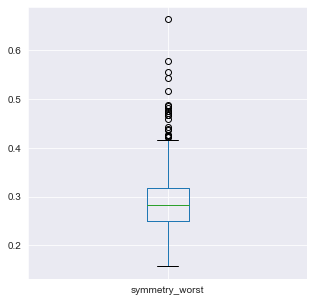

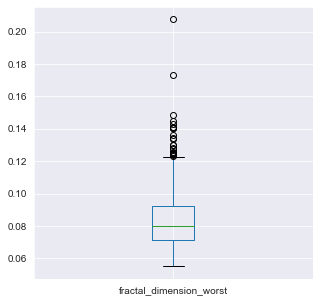

In [73]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for i in cols:
    data.boxplot(i, figsize=(5,5))
    plt.show()

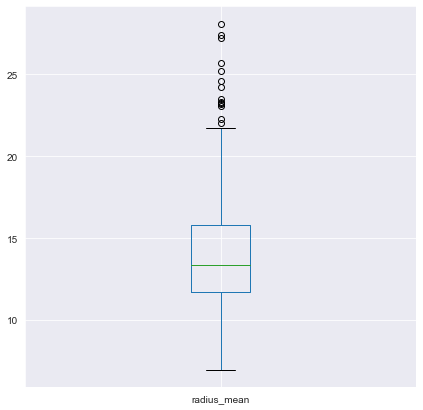

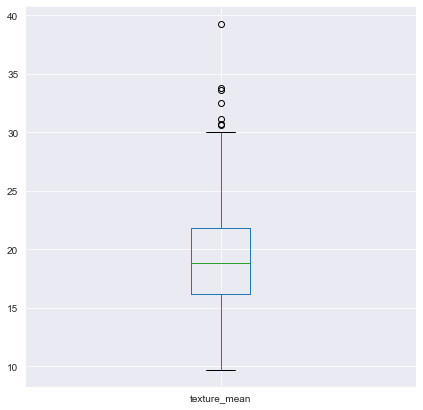

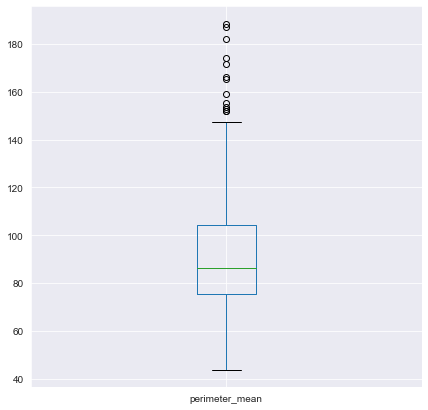

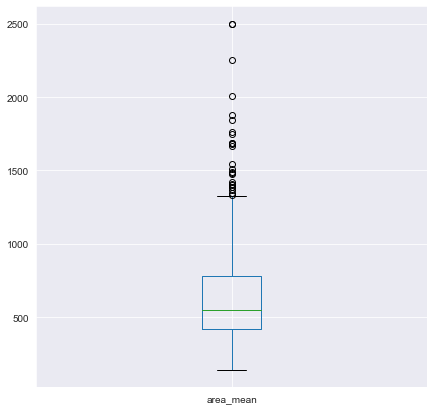

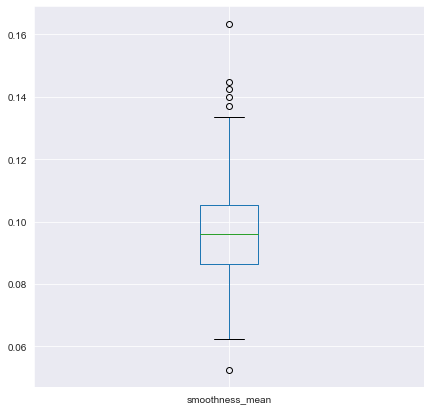

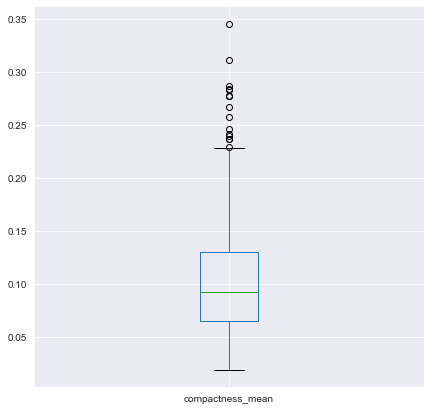

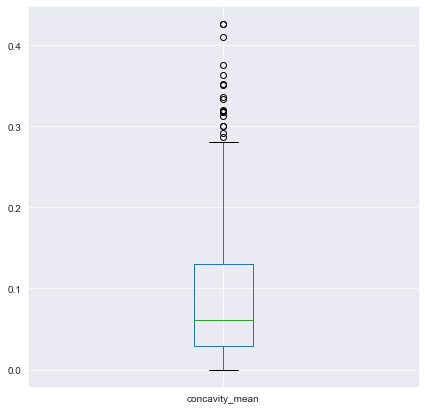

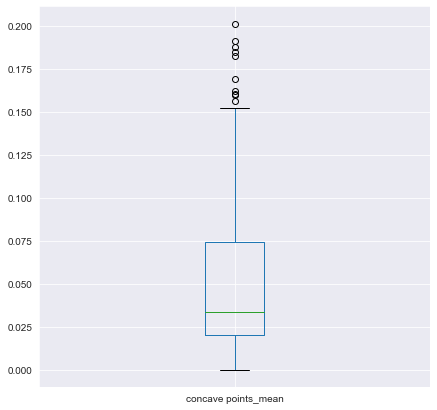

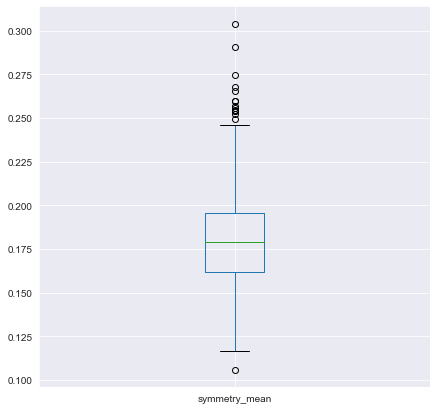

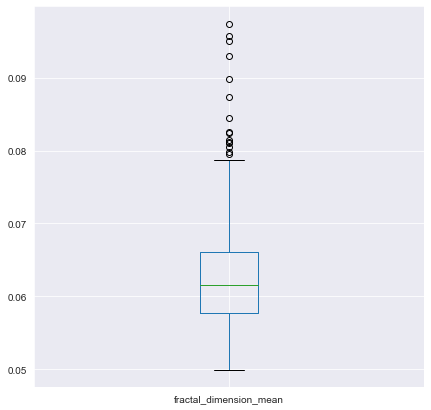

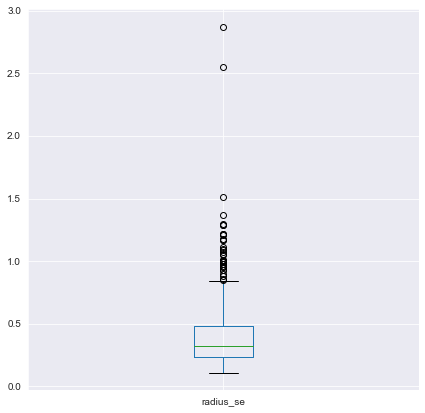

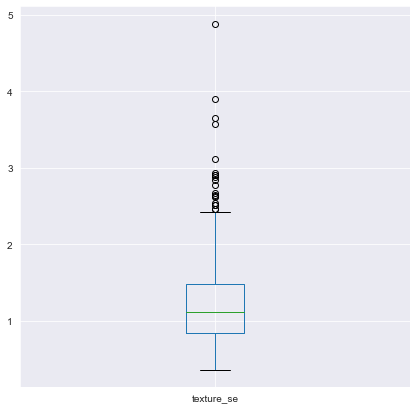

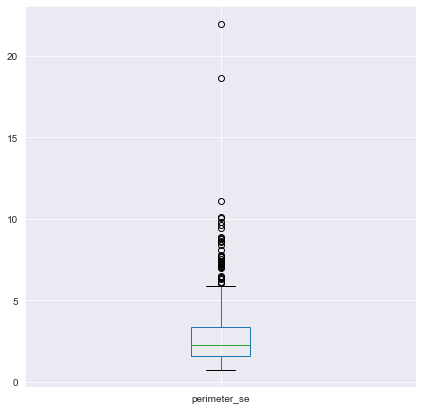

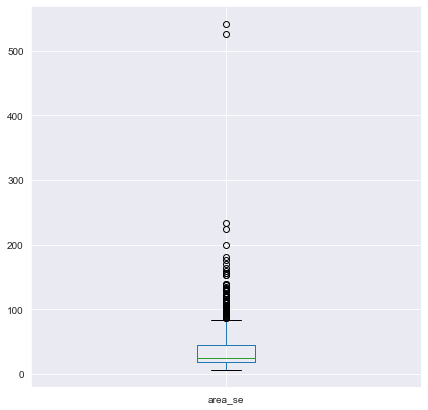

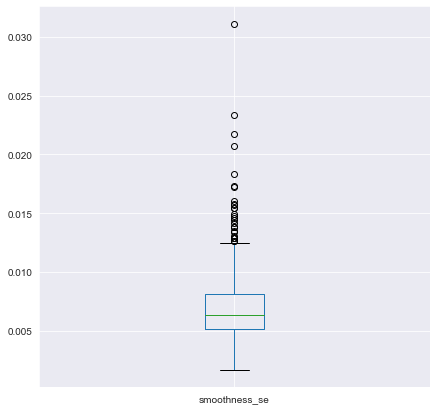

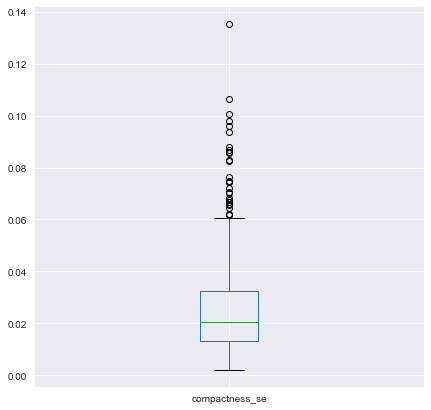

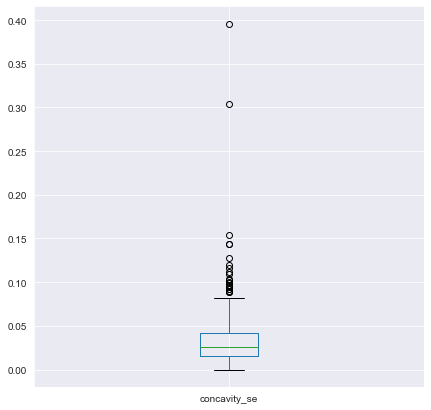

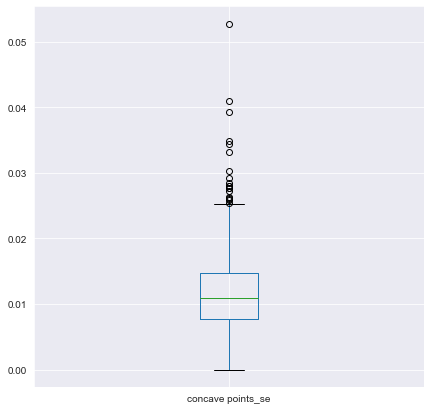

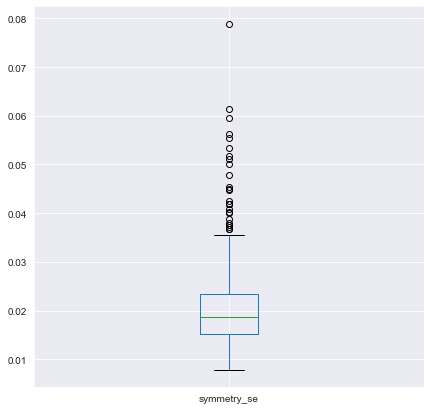

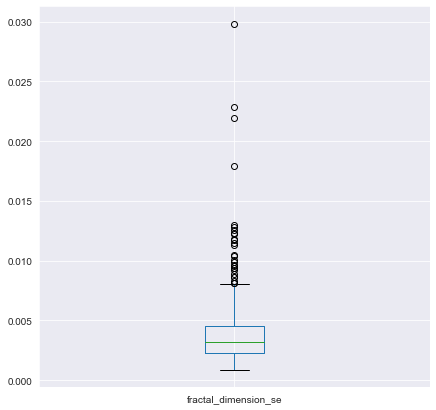

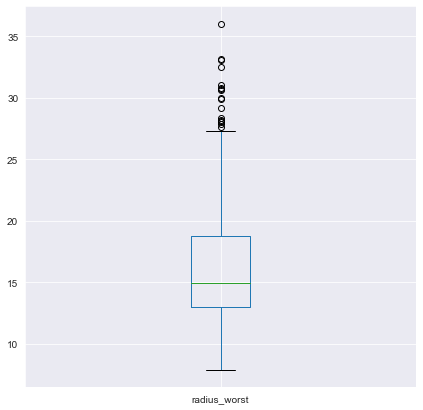

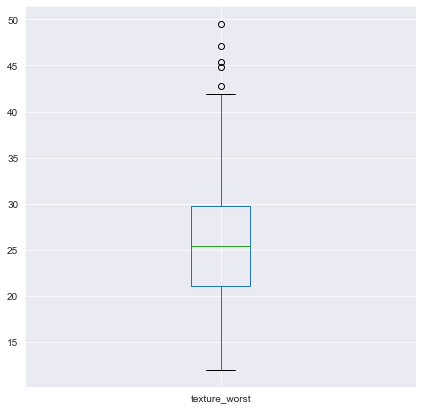

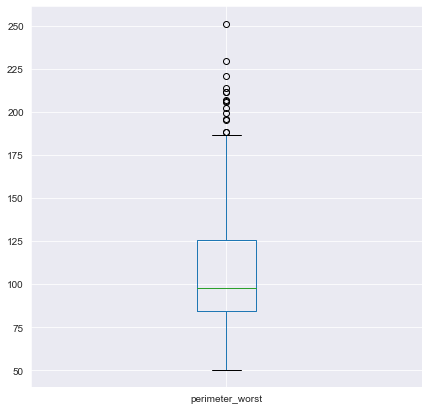

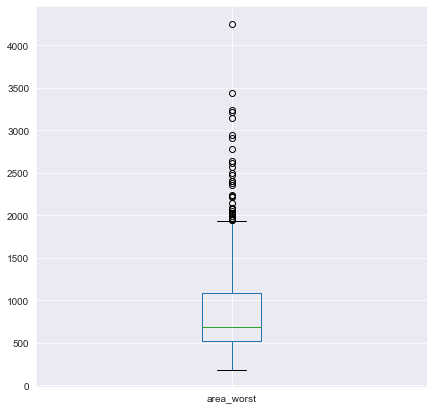

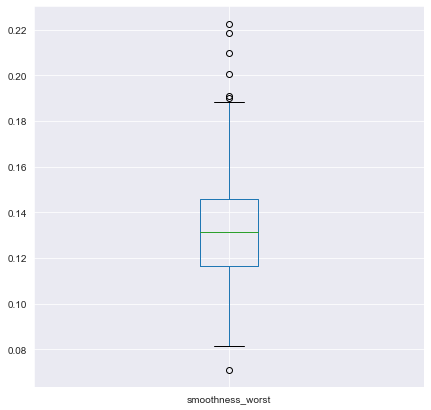

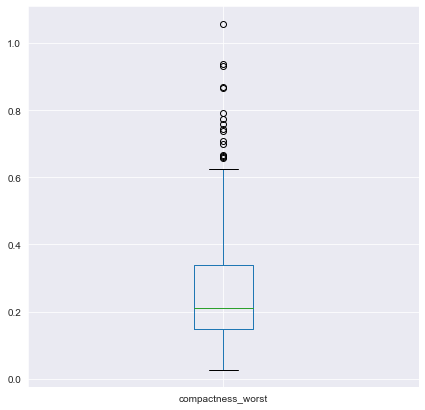

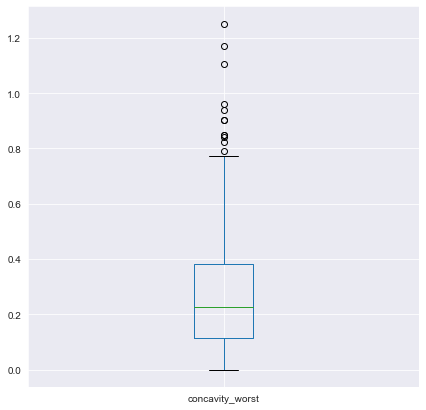

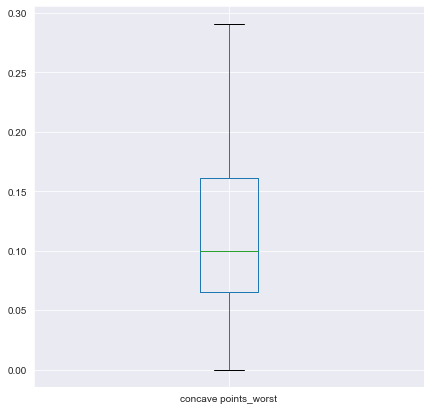

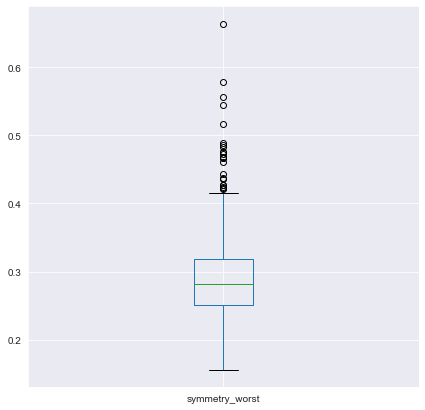

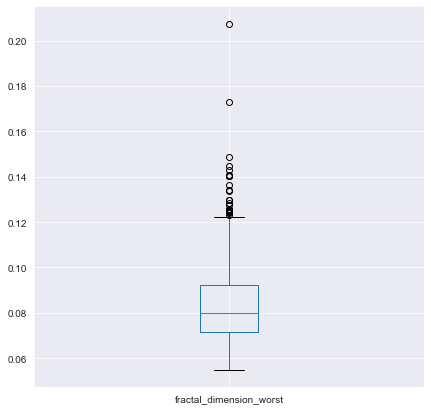

In [74]:
for row in data.iloc[:,1:]:
    data.boxplot(row, figsize=(7,7))
    plt.show()

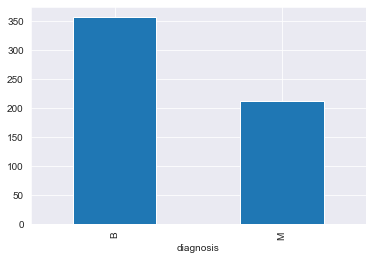

In [454]:
k = data.groupby('diagnosis').size()

k.plot(kind = 'bar')
plt.show()

In [78]:
""" Plot de Correlaciones """

data.corr().style.background_gradient('coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


.

#### 2.1.2 Plots de Matplotlib <a class="anchor" id="PlotsMat"></a>

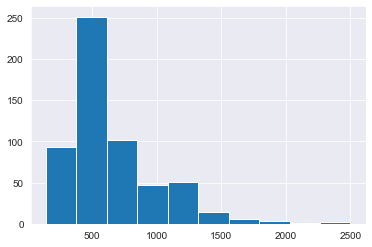

In [80]:
""" Histogramas """

plt.hist(data.area_mean)
plt.show()

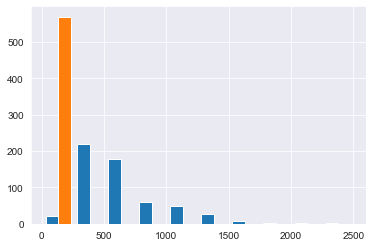

In [82]:
plt.hist(data[['area_mean', 'texture_mean']]) #Para esto es mejor Pandas
plt.show()

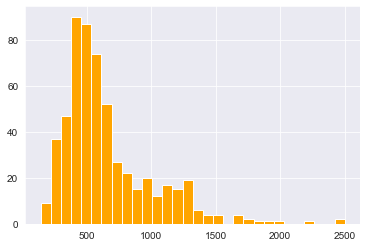

In [84]:
plt.hist(data.area_mean, bins=30, color="orange")
plt.show()

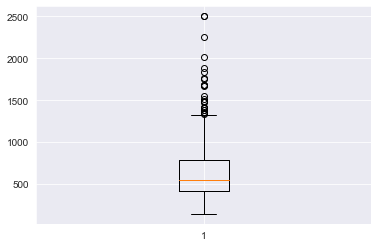

In [86]:
""" Boxplot """

plt.boxplot(data['area_mean'])
plt.show()

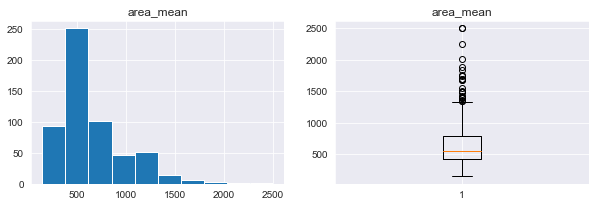

In [90]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1) #Una fila, dos columnas, una figura
plt.hist(data['area_mean'])
plt.title('area_mean')

plt.subplot(1,2,2) #Una fila, dos columnas, segunda figura
plt.boxplot(data['area_mean'])
plt.title('area_mean')

plt.show()

##### Ejercicio, bucle, mostrar histrogramas mas boxplots de 3 o todos los elementos

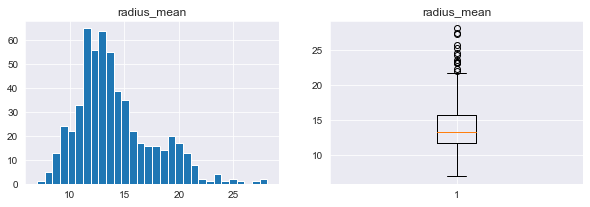

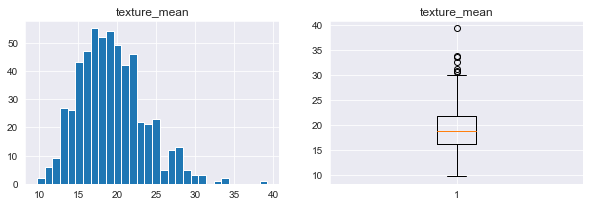

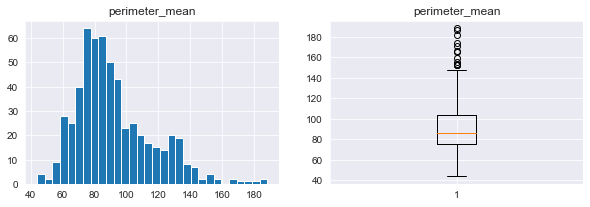

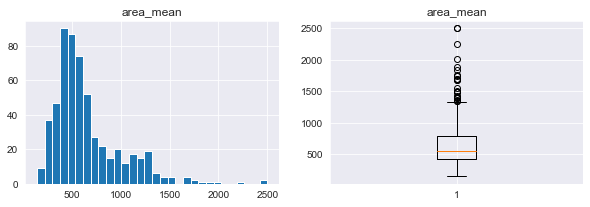

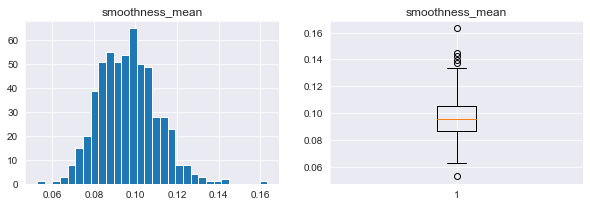

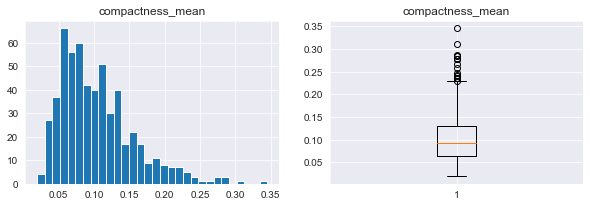

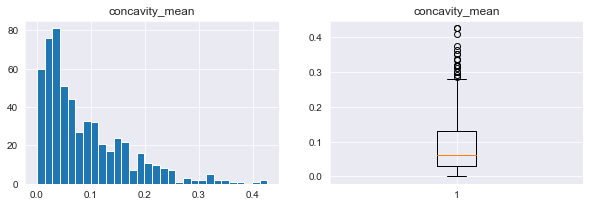

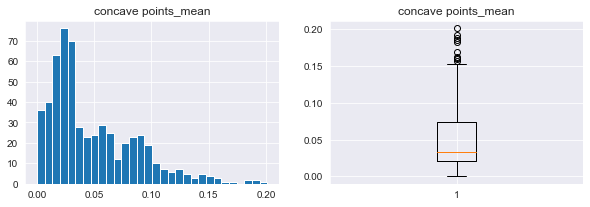

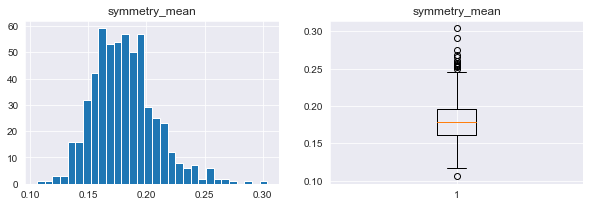

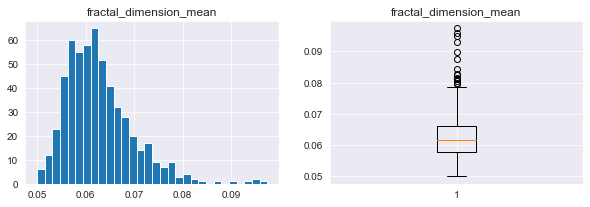

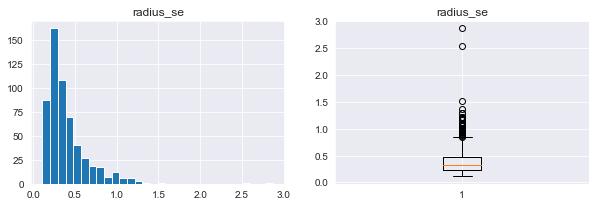

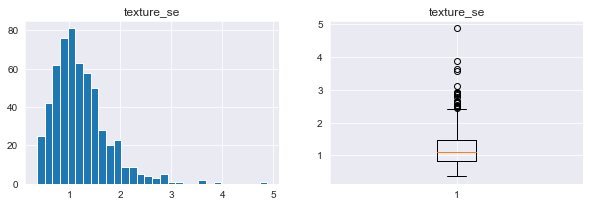

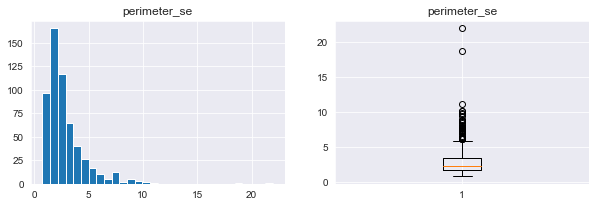

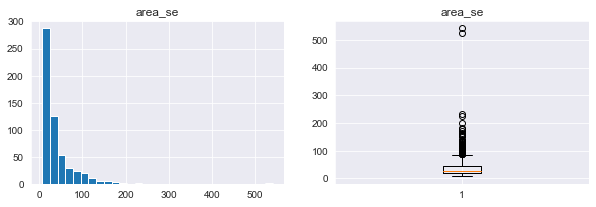

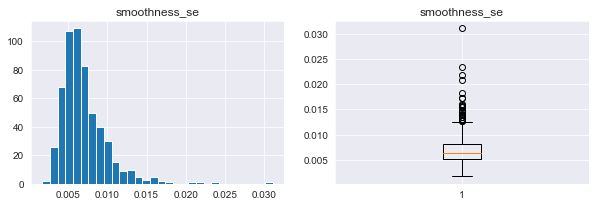

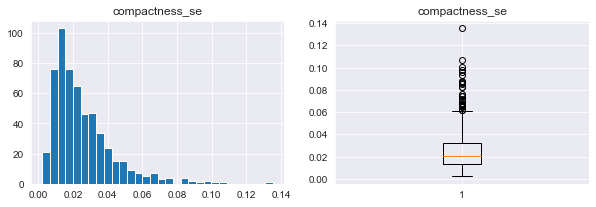

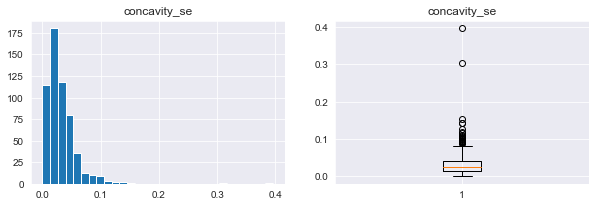

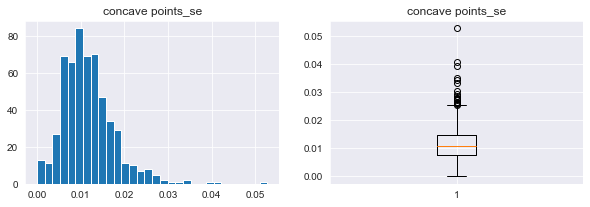

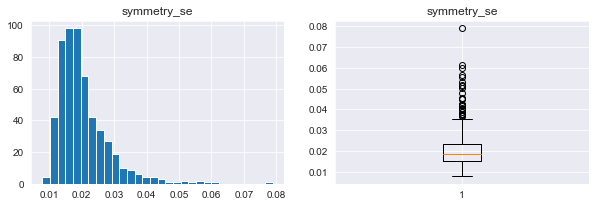

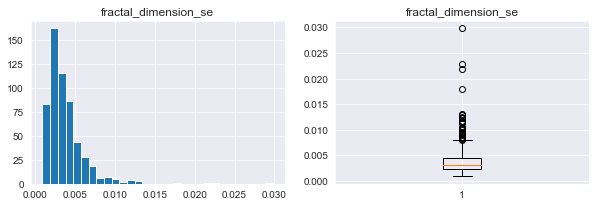

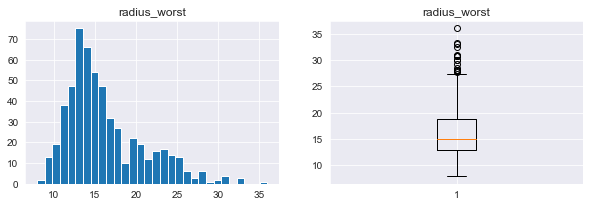

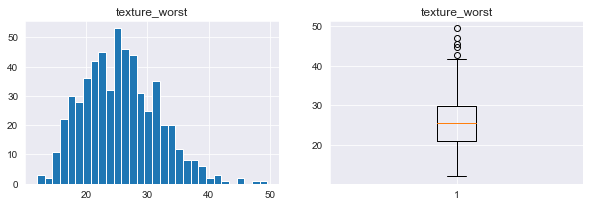

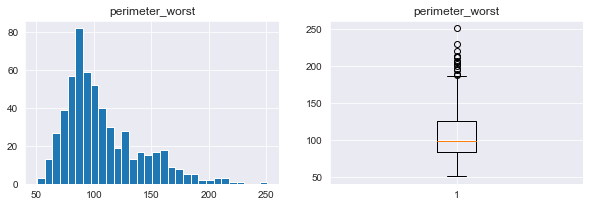

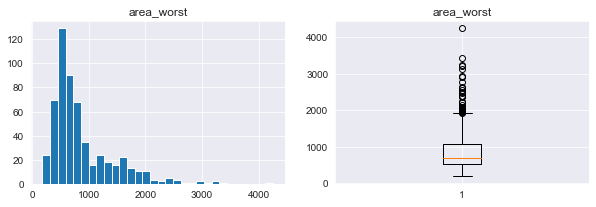

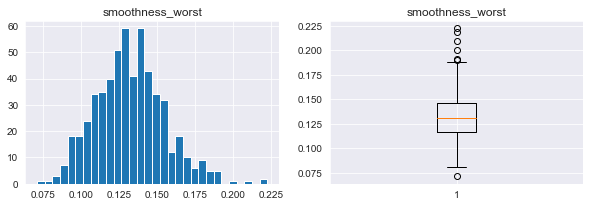

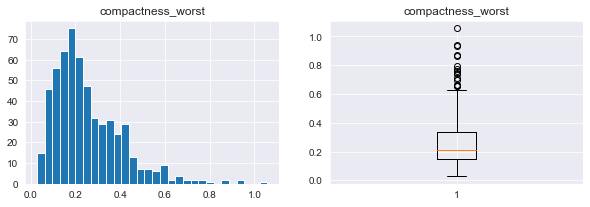

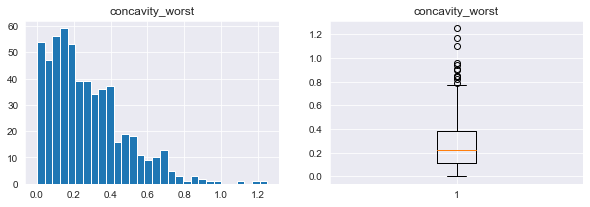

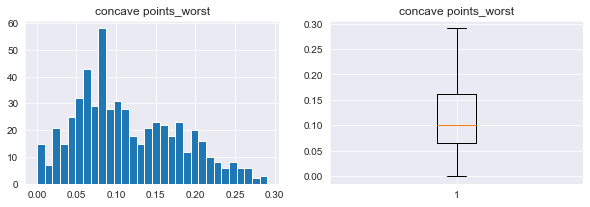

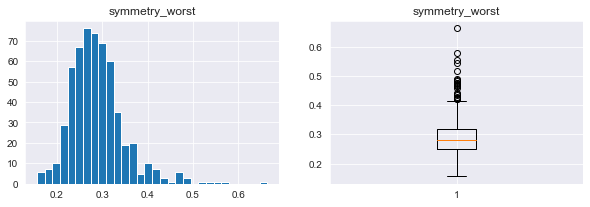

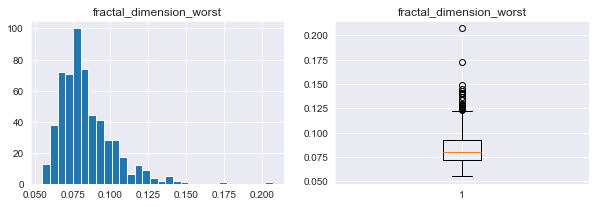

In [93]:
for i in data.iloc[:, 1:]:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1) #Una fila, dos columnas, una figura
    plt.hist(data[i], bins=30)
    plt.title(str(i))

    plt.subplot(1,2,2) #Una fila, dos columnas, segunda figura
    plt.boxplot(data[i])
    plt.title(str(i))

    plt.show()

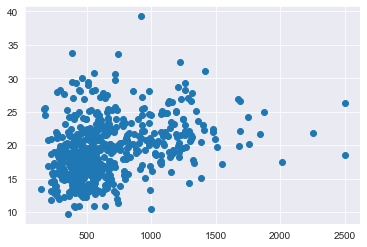

In [96]:
""" Scatter Plot """

plt.scatter(data.area_mean, data.texture_mean)
plt.show()

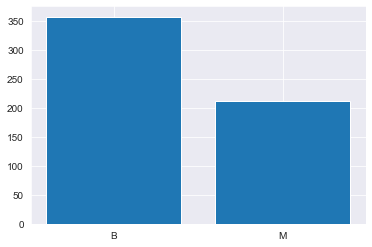

In [97]:
k = data.groupby('diagnosis').size()

plt.bar(k.index, k)
plt.show()

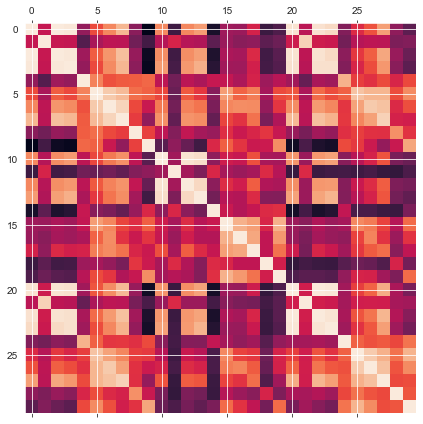

In [107]:
""" Correlaciones """

plt.figure(figsize=(7,7))
plt.matshow(data.corr(), fignum=1)  # Es mejor usar Pandas para las correlaciones que Matplotlib

plt.show()

#### 2.1.3 Plots en Seaborn <a class="anchor" id="PlotsSeaborn"></a>

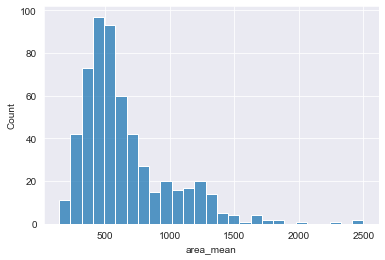

In [108]:
""" Histogramas """

sns.histplot(data=data, x='area_mean')
plt.show()

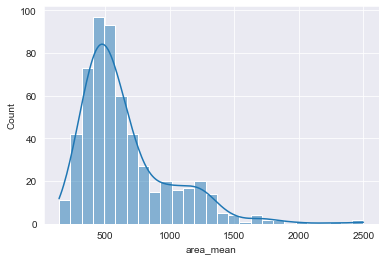

In [109]:
sns.histplot(data=data, x='area_mean', kde=True)
plt.show()

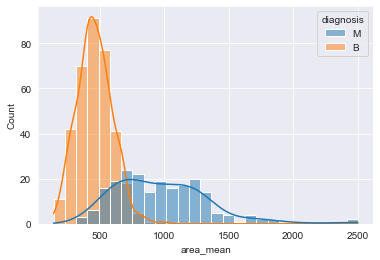

In [112]:
sns.histplot(data=data, x='area_mean', hue="diagnosis") #Poder plotear la variable categorica es muy muy util, ahora podemos sacar conslusiones
plt.show()

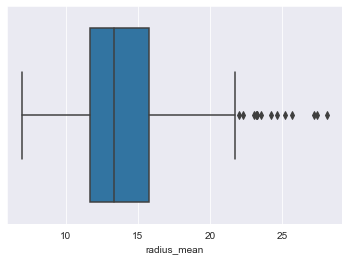

In [114]:
""" Boxplots """

sns.boxplot(data=data, x='radius_mean')
plt.show()

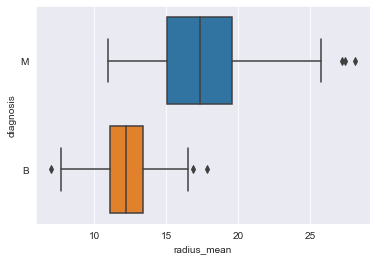

In [115]:
sns.boxplot(data=data, x='radius_mean', y='diagnosis')
plt.show()

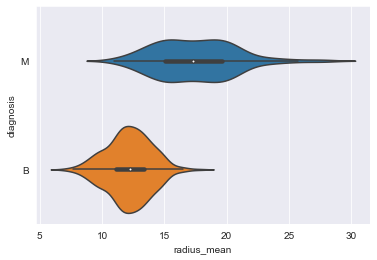

In [116]:
sns.violinplot(data=data, x='radius_mean', y='diagnosis')
plt.show()

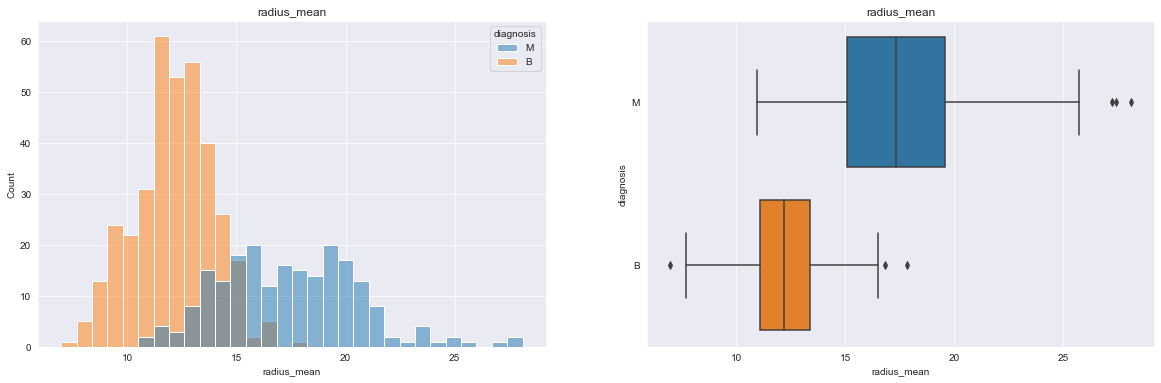

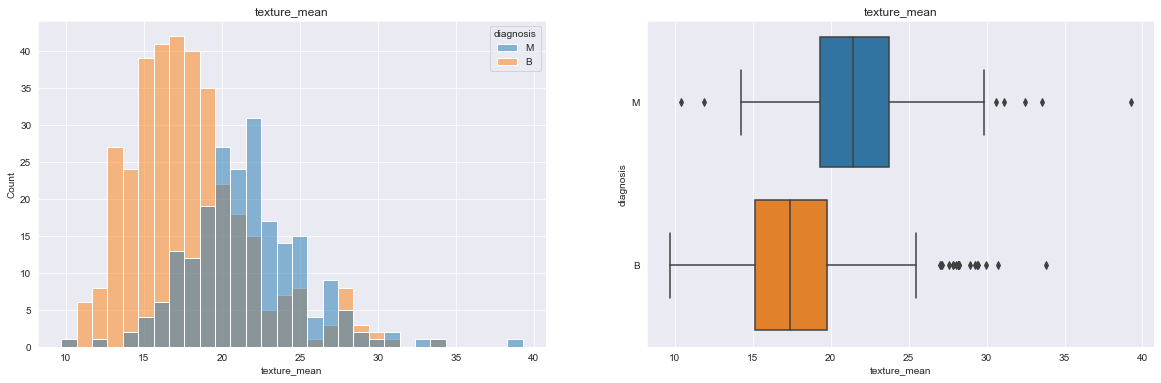

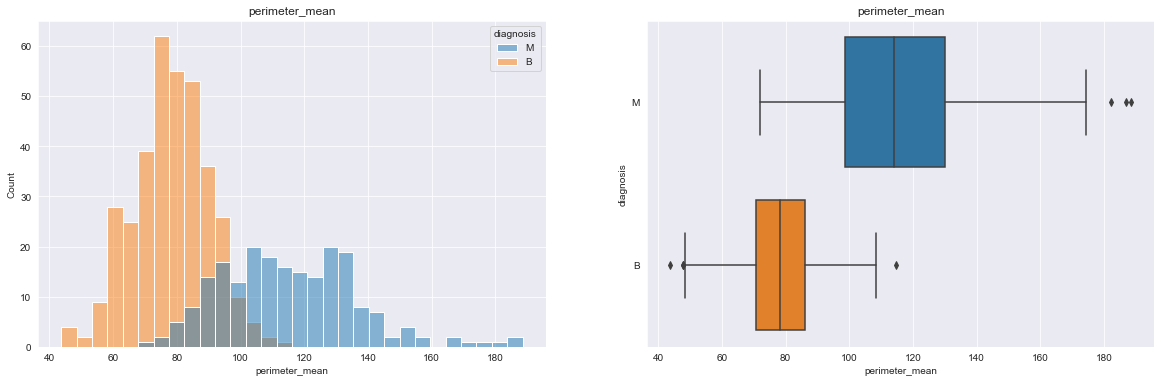

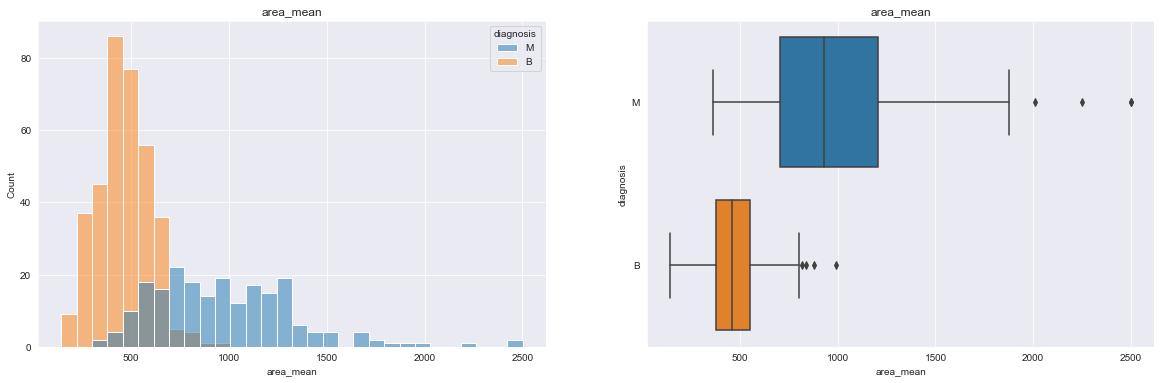

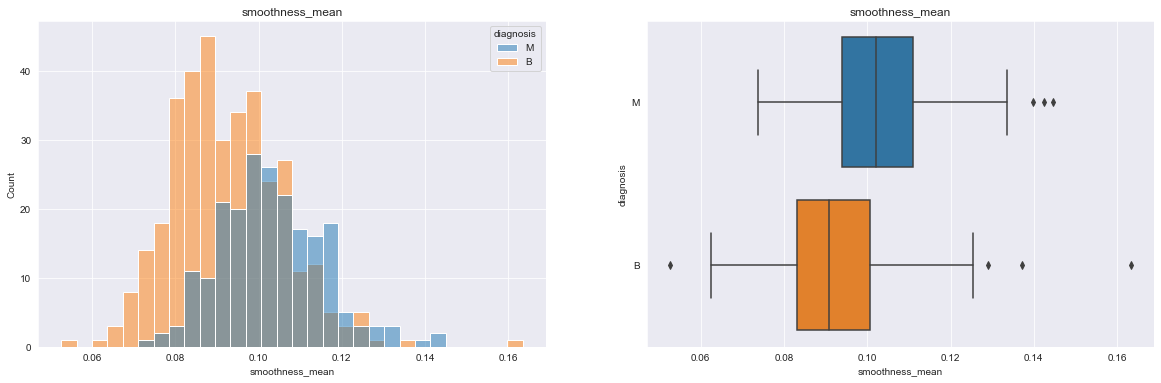

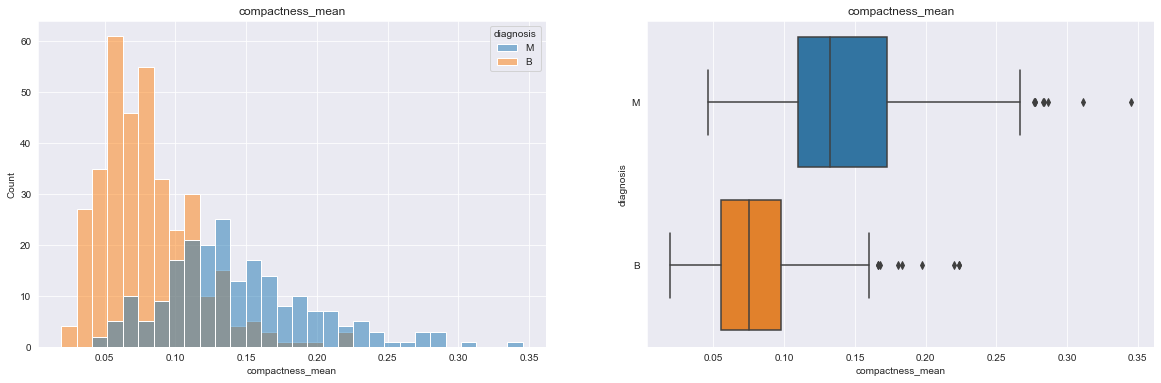

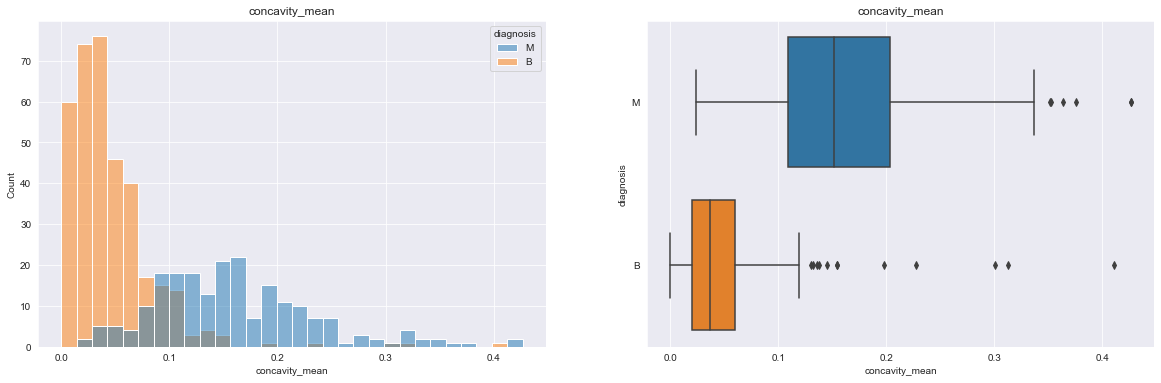

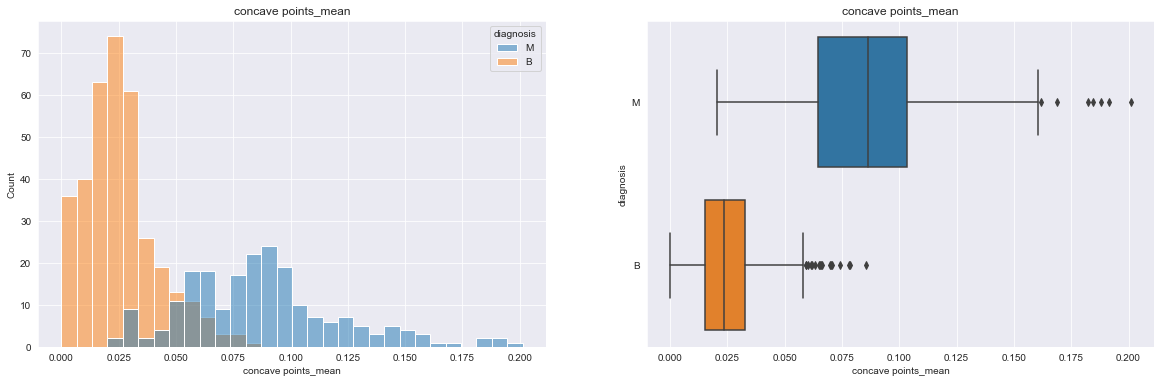

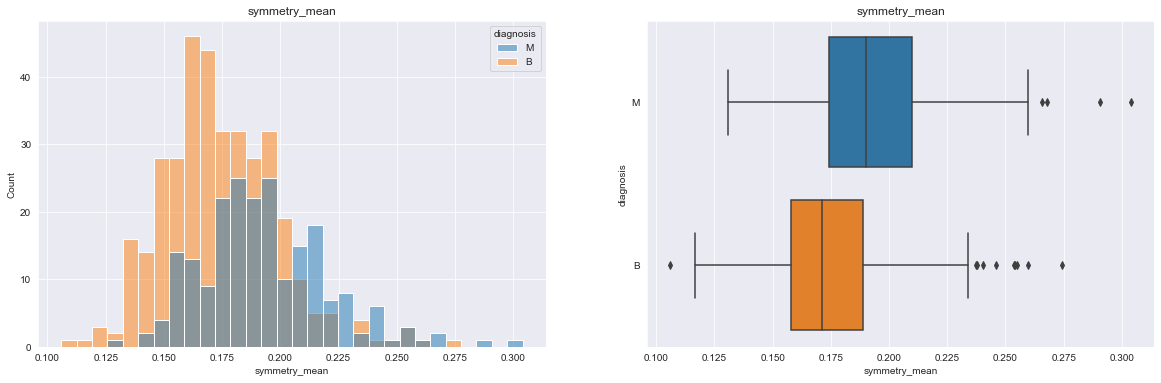

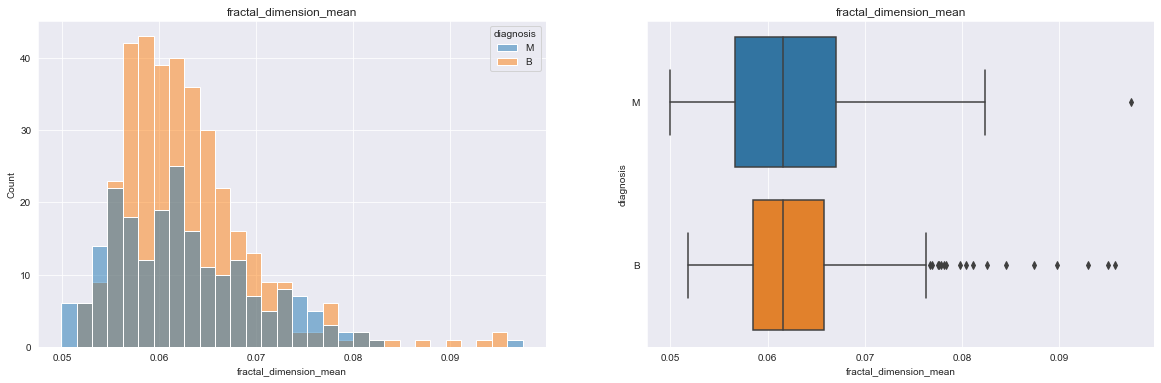

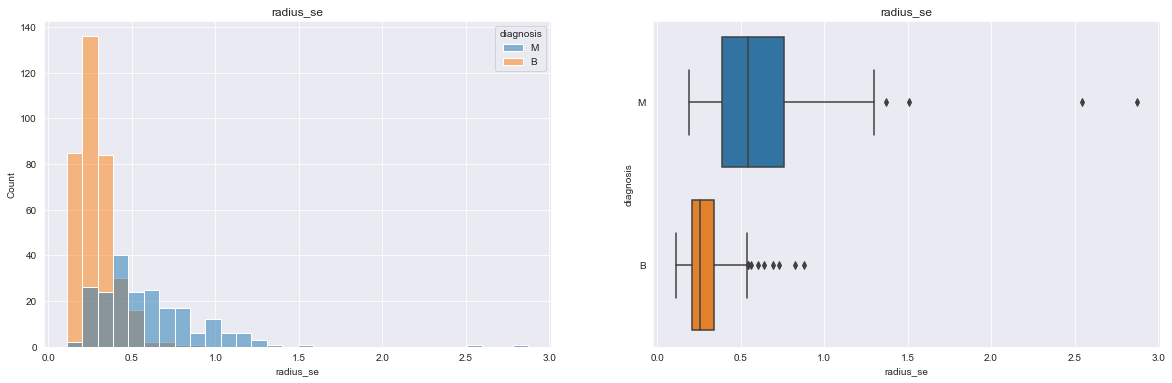

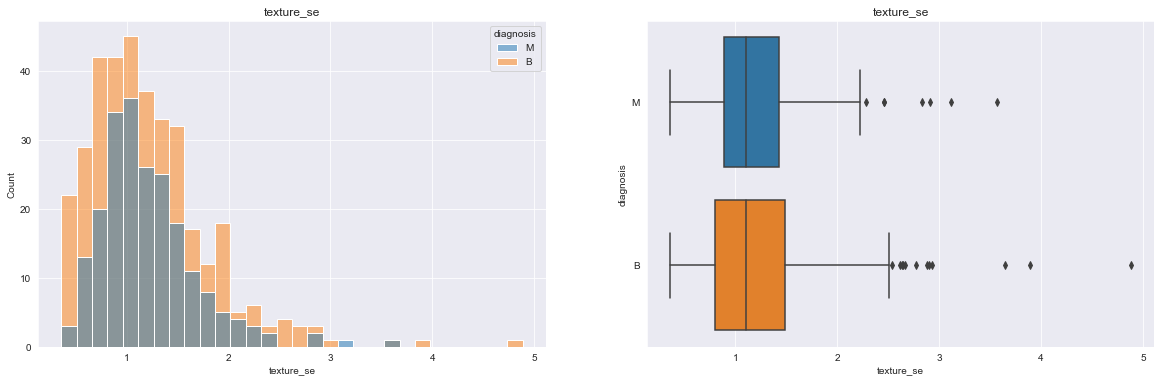

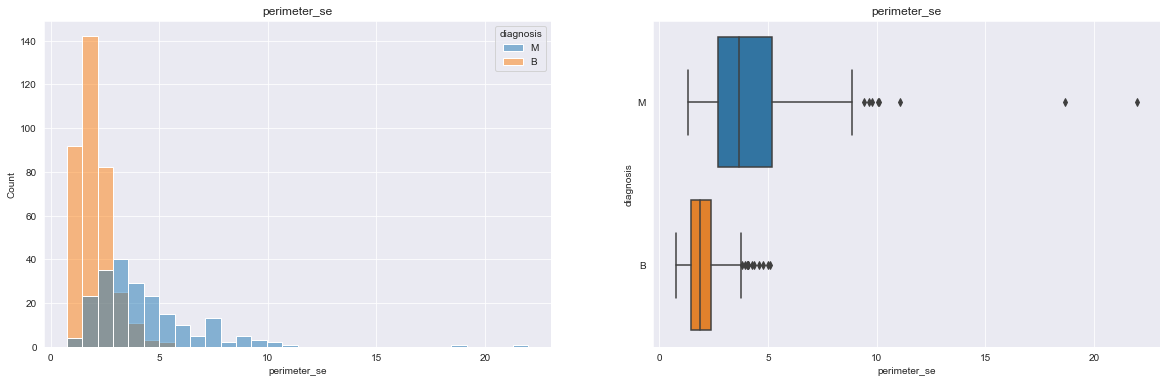

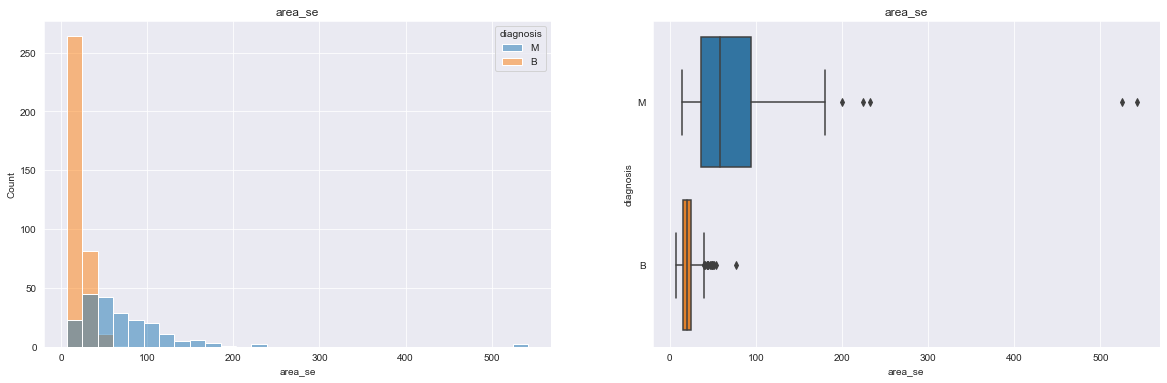

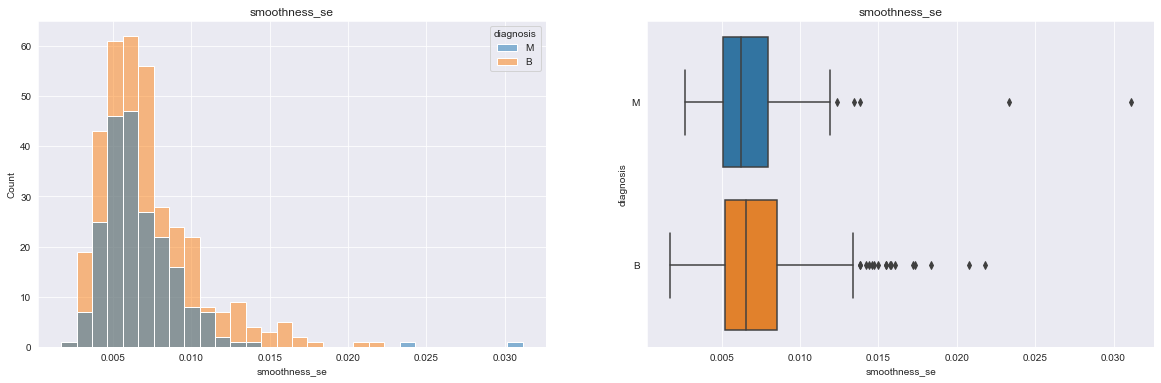

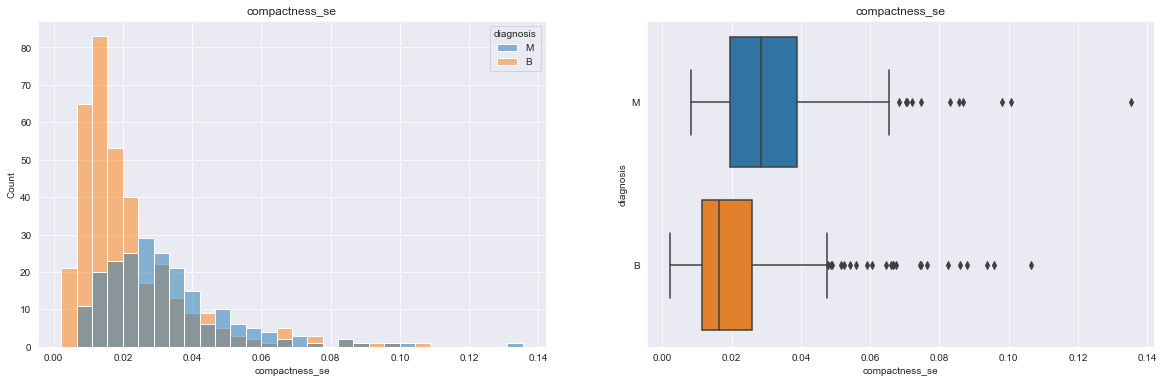

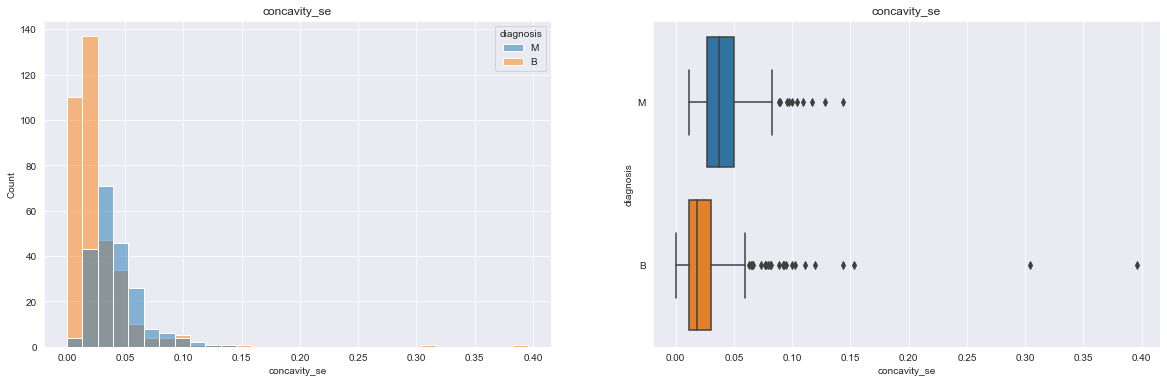

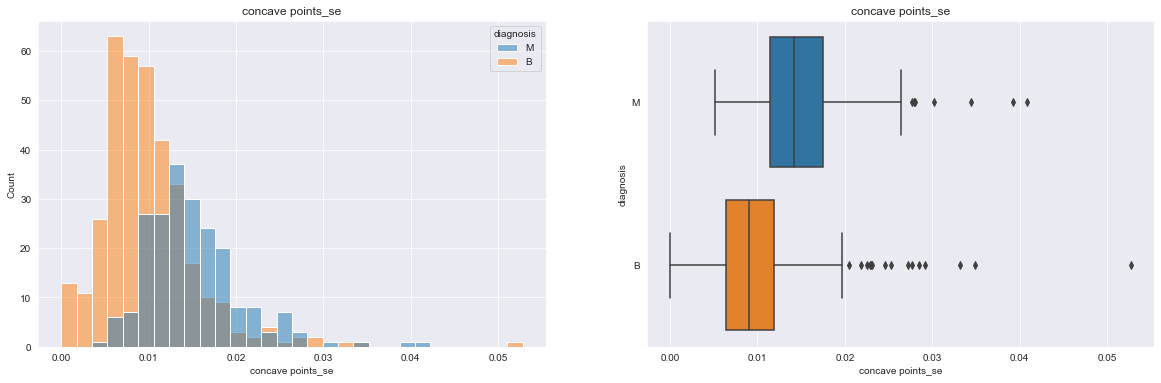

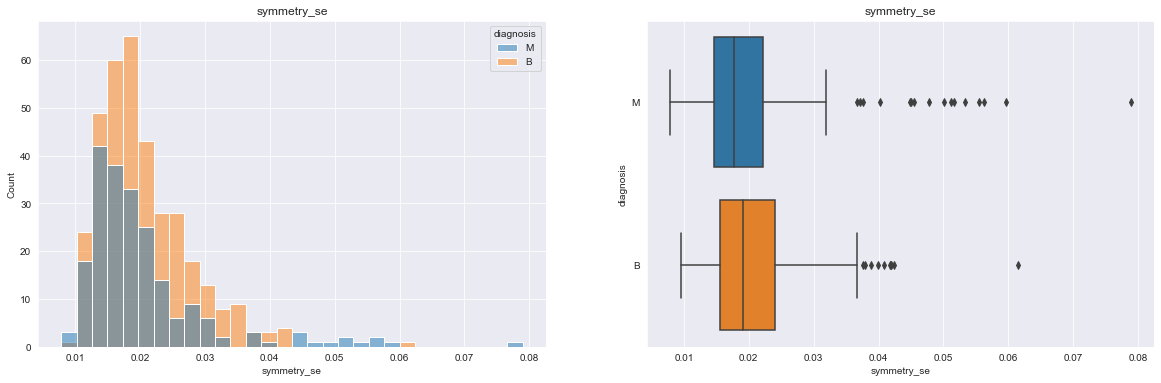

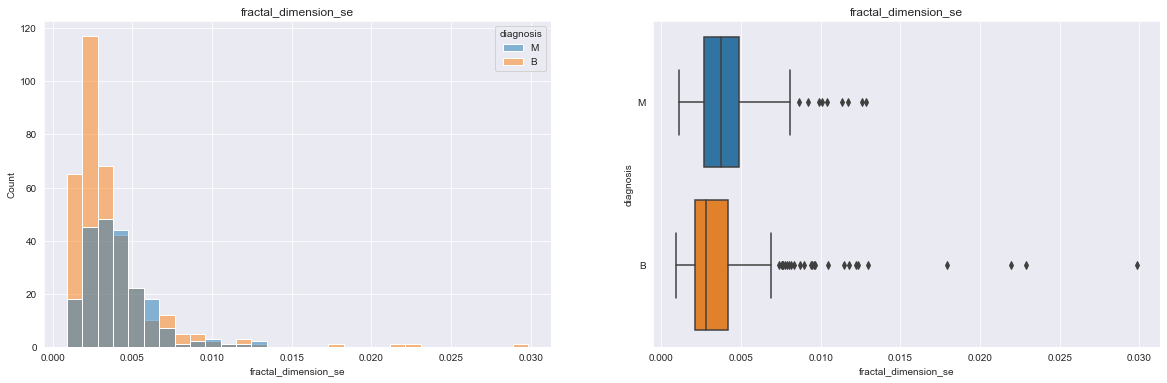

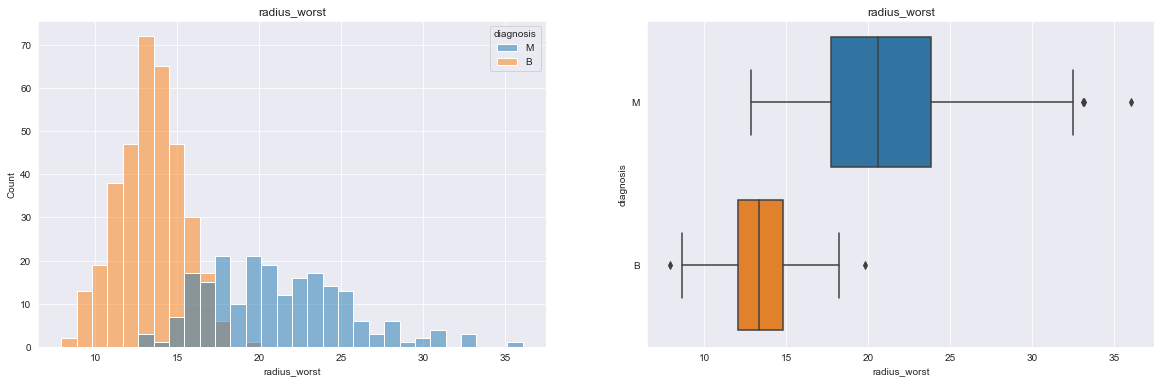

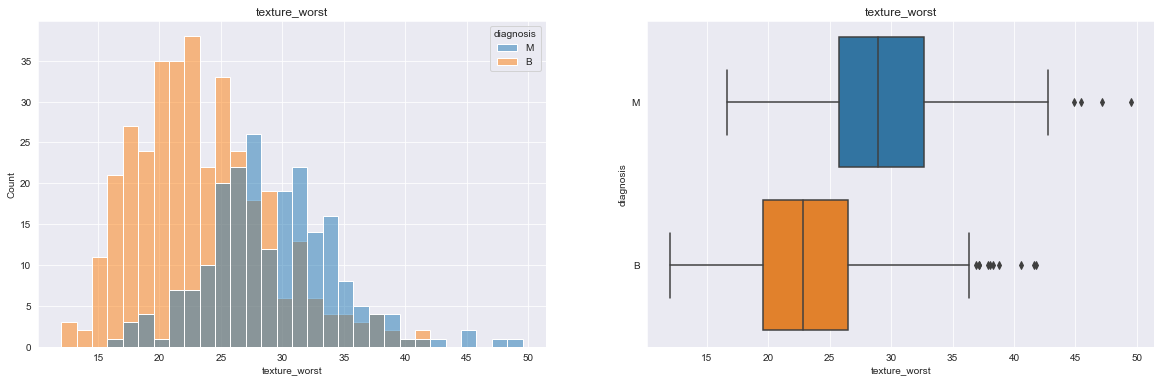

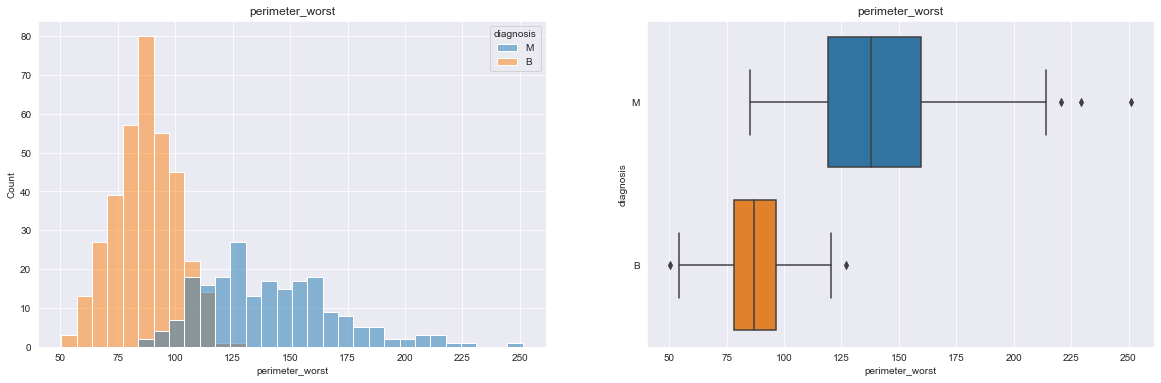

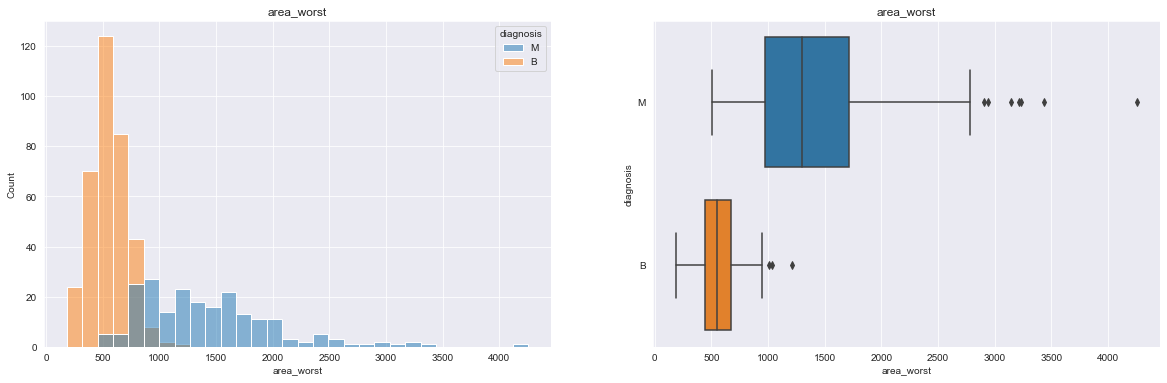

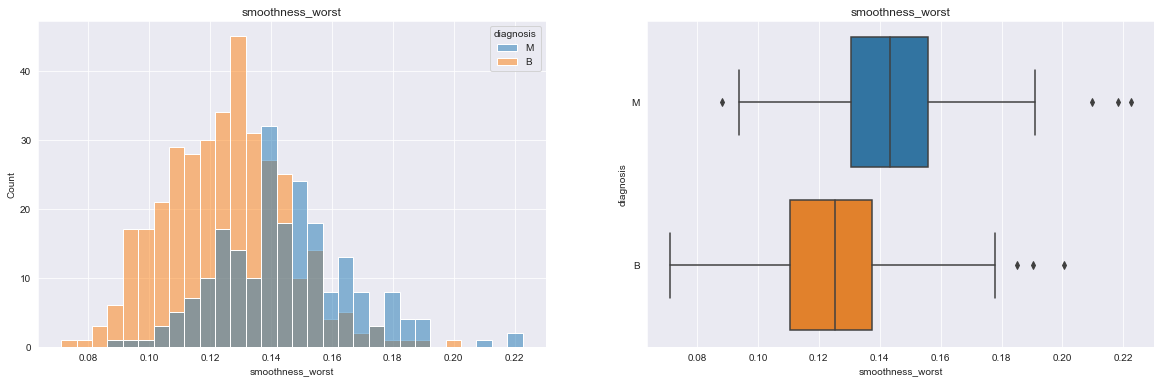

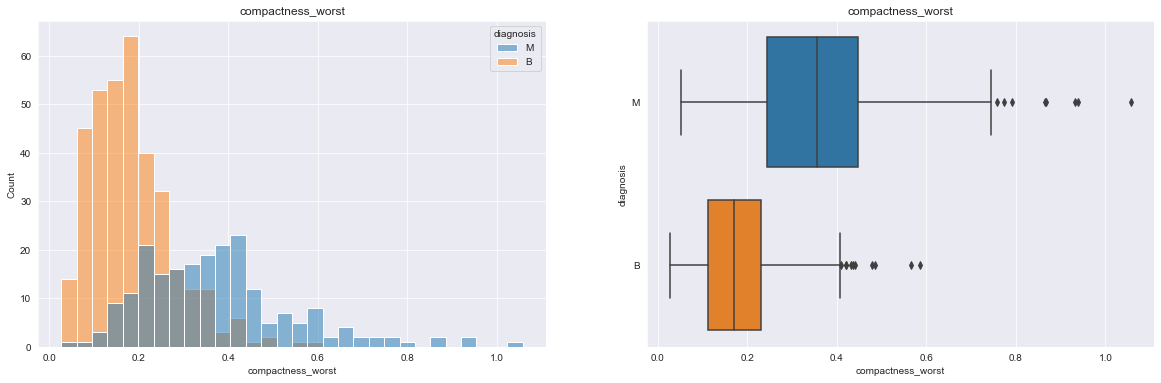

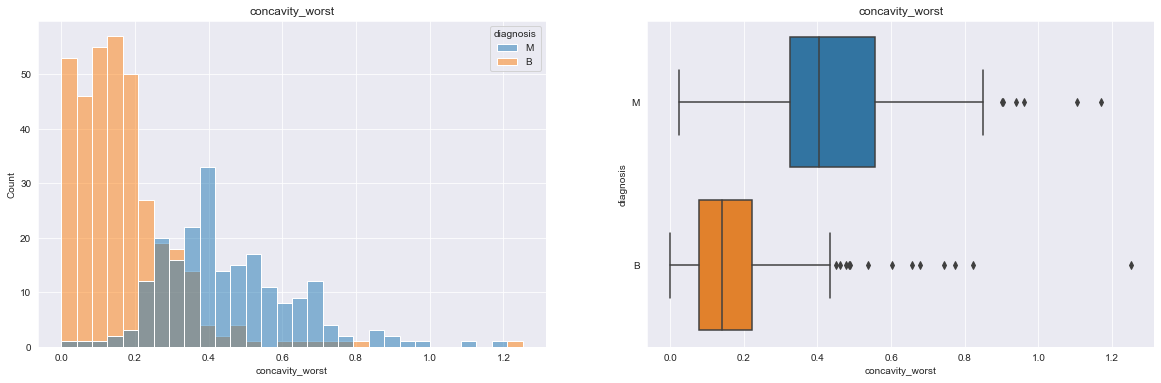

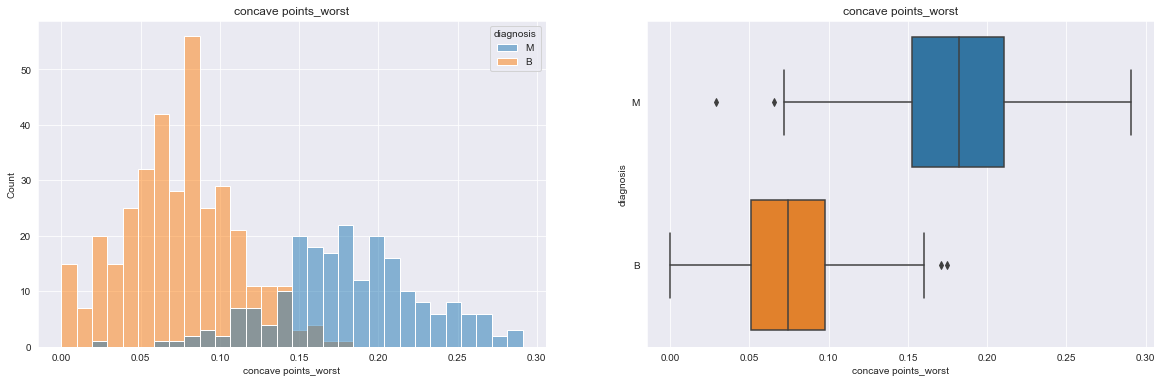

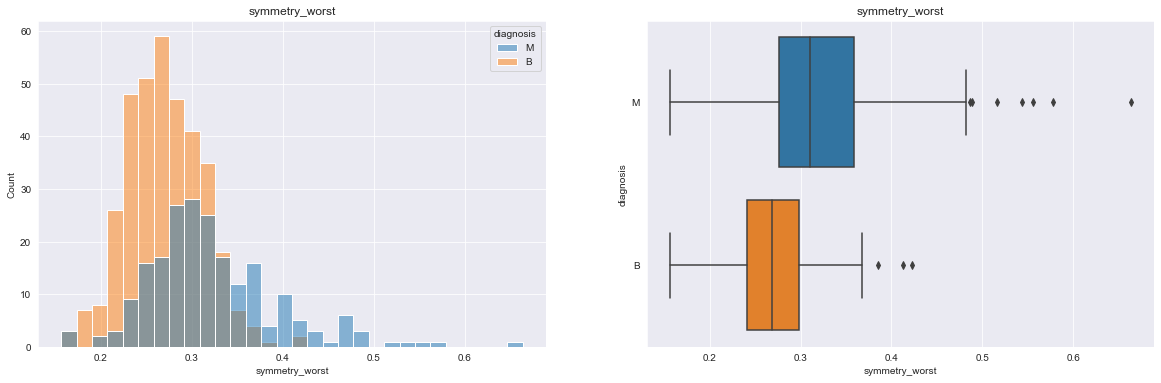

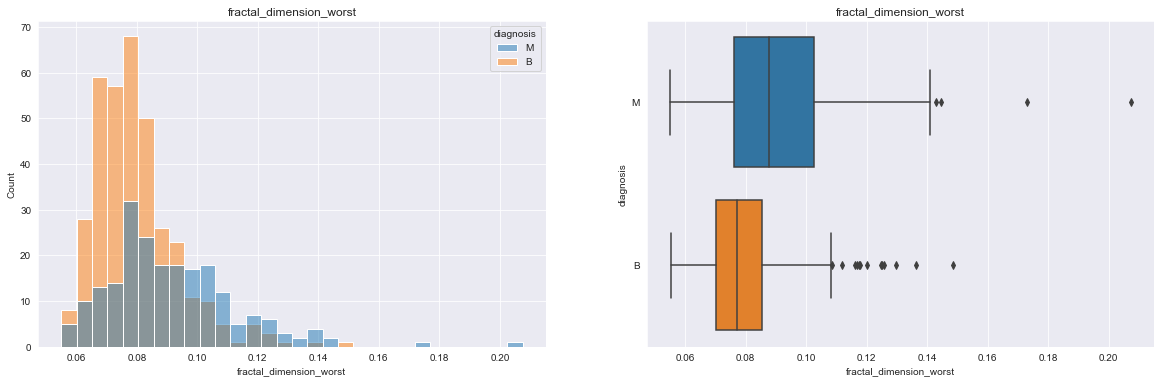

In [119]:
# Ejercicio, bucle, comparar boxplots, histogramas vs target, todas las variables

for i in data.iloc[:,1:]:
    plt.figure(figsize=(20,6))
    
    plt.subplot(1,2,1) #Una fila, dos columnas, una figura
    sns.histplot(data=data, x=i, hue='diagnosis', bins=30)
    plt.title(str(i))

    plt.subplot(1,2,2) #Una fila, dos columnas, segunda figura
    sns.boxplot(data=data, x=i, y='diagnosis')
    plt.title(str(i))

    plt.show()

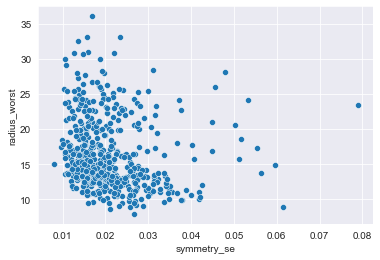

In [120]:
""" Scatterplots """

sns.scatterplot(data=data, x='symmetry_se', y='radius_worst')
plt.show()

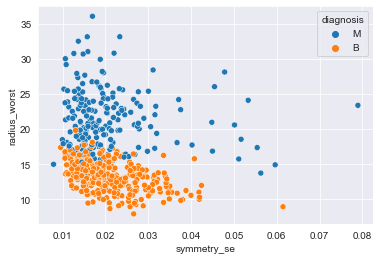

In [121]:
sns.scatterplot(data=data, x='symmetry_se', y='radius_worst', hue='diagnosis')
plt.show()

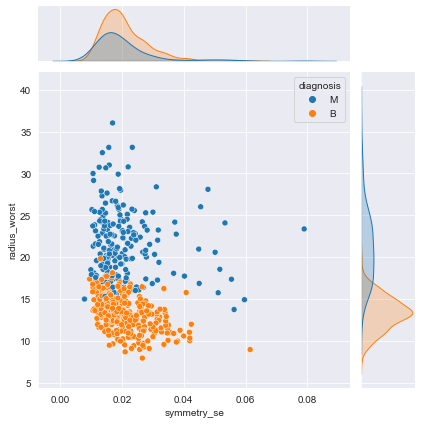

In [122]:
sns.jointplot(data=data, x='symmetry_se', y='radius_worst', hue='diagnosis')
plt.show()

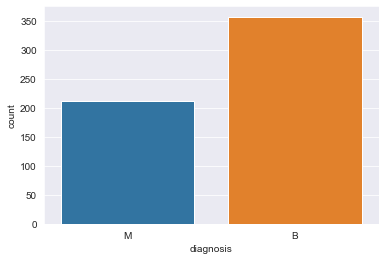

In [123]:
""" Barplot """

sns.countplot(data=data, x='diagnosis') 
plt.show()

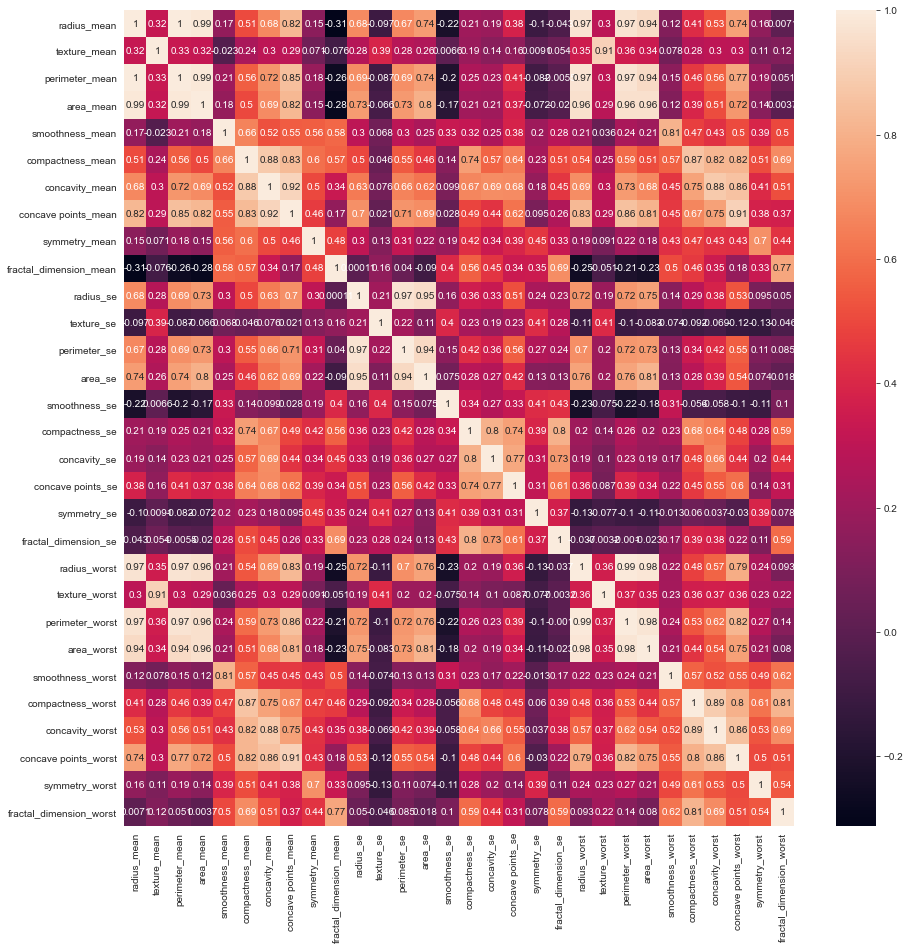

In [125]:
""" Correlaciones """

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

.

## 3. Transformacion de variables <a class="anchor" id="Transformacion"></a>

### 3.1 Normalizaciones y Reescalado <a class="anchor" id="Norm"></a>

In [190]:
features = data.drop('diagnosis', axis=1)
target = data.diagnosis

In [455]:
X = features['area_mean']
print(X.shape)
X = features[['area_mean']]
print(X.shape)
X = features[['area_mean', 'texture_mean']]
print(X.shape)
print(features.shape)

(569,)
(569, 1)
(569, 2)
(569, 30)


In [135]:
from sklearn.preprocessing import StandardScaler, Normalizer, Binarizer, MinMaxScaler

In [136]:
""" 1 Variable """

X = features[['area_mean']]
scaler = MinMaxScaler()

Xrescaled = scaler.fit(X).transform(X)

Xrescaled

array([[0.36373277],
       [0.50159067],
       [0.44941676],
       [0.10290562],
       [0.4892895 ],
       [0.14150583],
       [0.38027572],
       [0.18426299],
       [0.15961824],
       [0.14099682],
       [0.27753977],
       [0.27041357],
       [0.4154825 ],
       [0.27113468],
       [0.18443266],
       [0.218579  ],
       [0.22948038],
       [0.27796394],
       [0.47359491],
       [0.17934252],
       [0.15970308],
       [0.05531283],
       [0.23792153],
       [0.53467656],
       [0.32284199],
       [0.32627784],
       [0.21264051],
       [0.40318134],
       [0.24979852],
       [0.34426299],
       [0.40063627],
       [0.12602333],
       [0.32059385],
       [0.43202545],
       [0.28152704],
       [0.30795334],
       [0.20763521],
       [0.16131495],
       [0.23554613],
       [0.17633086],
       [0.17794274],
       [0.09654295],
       [0.40742312],
       [0.17039236],
       [0.16458112],
       [0.39554613],
       [0.024772  ],
       [0.165

In [137]:
pd_aux = pd.DataFrame(X)
pd_aux['rescaled'] = Xrescaled #para poder comprobar la transformacion con el valor sin transformar
pd_aux

,area_mean,rescaled
0,1001.0,0.363733
1,1326.0,0.501591
2,1203.0,0.449417
3,386.1,0.102906
4,1297.0,0.489290
...,...,...
564,1479.0,0.566490
565,1261.0,0.474019
566,858.1,0.303118
567,1265.0,0.475716


In [140]:
""" 2 o mas Variables"""

X = features[['area_mean', 'texture_mean']]
scaler = StandardScaler()  # La sintaxis podria ser la de arriba pero por hacerlo de otra manera la hacemos asi
scaler = scaler.fit(X)
Xrescaled = scaler.transform(X)

print(Xrescaled[0:5])
print(X[0:5])

[[ 0.9843749  -2.07333501]
 [ 1.90870825 -0.35363241]
 [ 1.55888363  0.45618695]
 [-0.76446379  0.25373211]
 [ 1.82622928 -1.15181643]]
   area_mean  texture_mean
0     1001.0         10.38
1     1326.0         17.77
2     1203.0         21.25
3      386.1         20.38
4     1297.0         14.34


In [141]:
Xback = scaler.inverse_transform(Xrescaled)
print(Xback[0:5])

[[1001.     10.38]
 [1326.     17.77]
 [1203.     21.25]
 [ 386.1    20.38]
 [1297.     14.34]]


##### Ejercicio, hacer un binarizer cuyo threshold es la mediana, para 'area_mean'

In [154]:
X = features[['area_mean']]
umbral = np.median(X)

scaler = Binarizer(threshold=umbral)
Xbin = scaler.fit_transform(X)

print(umbral)
print(Xbin[0:15])
print(X[0:15])

551.1
[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
    area_mean
0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
5       477.1
6      1040.0
7       577.9
8       519.8
9       475.9
10      797.8
11      781.0
12     1123.0
13      782.7
14      578.3


##### Ejercicio, hacer histrograma a la izquierda con la x original y a la derecha haciendo un MinMax y lo haremos para hacer 3 features

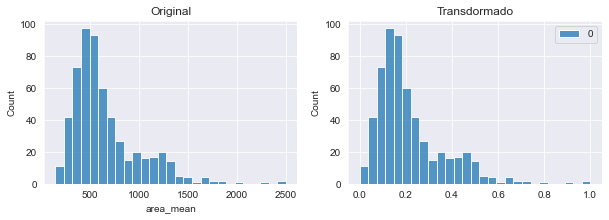

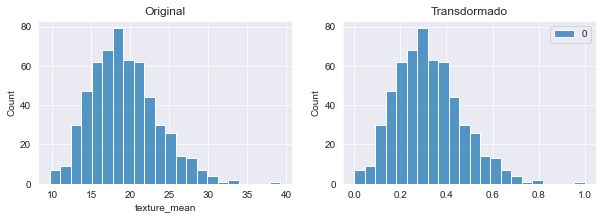

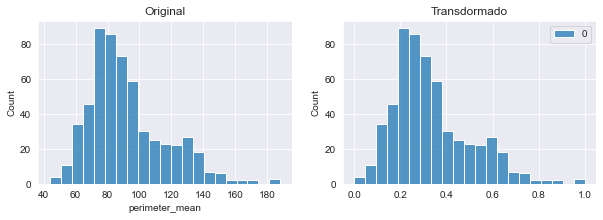

In [181]:
X = features[['area_mean', 'texture_mean', 'perimeter_mean']]
for i in X:
    
    scaler = MinMaxScaler()
    Xrescaled = scaler.fit(X[[i]]).transform(X[[i]])
    
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1) #Una fila, dos columnas, una figura
    plt.title('Original')
    sns.histplot(data=X, x=i)
    
    
    plt.subplot(1,2,2) #Una fila, dos columnas, una figura
    plt.title('Transdormado')
    sns.histplot(data=Xrescaled)
    plt.show()

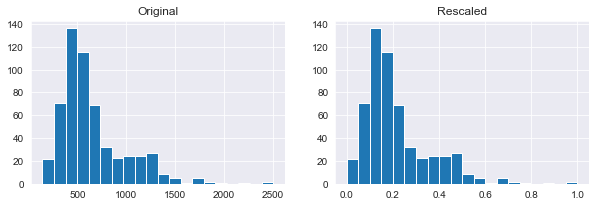

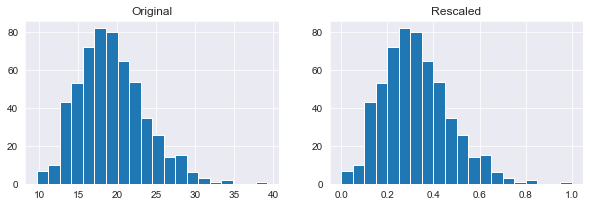

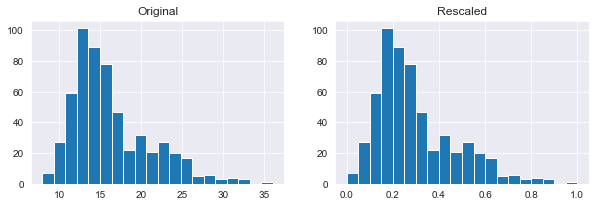

In [186]:
# La forma del profe:

cols = ['area_mean', 'texture_mean', 'radius_worst']

for col in cols:
    X = data[[col]]
    
    scaler=MinMaxScaler().fit(X)
    Xrescaled=scaler.transform(X)
    
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1) #Una fila, dos columnas, una figura
    plt.title('Original')
    plt.hist(X, bins = 20)
    
    plt.subplot(1,2,2) #Una fila, dos columnas, una figura
    plt.title('Rescaled')
    plt.hist(Xrescaled, bins = 20)
    plt.show()

##### Ejercicio: 
- Modelo 1: Hacer un binarizer por la mediana + Regresion Logistica, para todas las features
- Modelo 2:  comparar con una Regresion Logistica sin Binarizar

In [237]:
from sklearn.model_selection import train_test_split

X, y = features, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [238]:
""" Modelo 1 """

#Mediana de nuestro X_train:

umbral = np.median(X_train, axis=0)
scaler = Binarizer(threshold=umbral)
Xscaled_train = scaler.fit_transform(X_train)


model1 = LogisticRegression()
model1.fit(Xscaled_train, y_train)

Xscaled_test = scaler.transform(X_test)
score1 = model1.score(Xscaled_test, y_test)

print(score1)

0.9385964912280702


In [239]:
""" Modelo 2 """
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)
score2 = model2.score(X_test, y_test)

print(score2)

0.9473684210526315


.

## 4. Features Selection <a class="anchor" id="Features"></a>

In [243]:
from sklearn.feature_selection import SelectKBest, chi2

In [244]:
X, y = features, target

In [253]:
test = SelectKBest(score_func=chi2, k=4) # Nos permite seleccionar features en funcion de un test estadistico.
results = test.fit(X,y)

# print(results.scores_)
# print(results.pvalues_)

pd_results = pd.DataFrame(zip(features.columns, results.scores_, results.pvalues_), columns = ['features', 'score', 'pavlor'])
pd_results.sort_values('score', ascending = False).head()
pd_results.sort_values('score', ascending = False).tail()

,features,score,pavlor
11,texture_se,0.009794,0.921168
19,fractal_dimension_se,0.006371,0.936380
14,smoothness_se,0.003266,0.954425
18,symmetry_se,0.000080,0.992847
9,fractal_dimension_mean,0.000074,0.993122


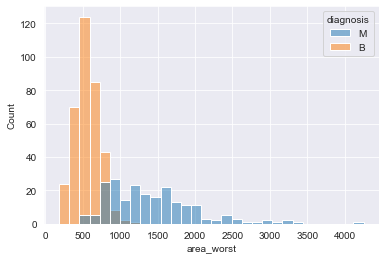

In [252]:
# Vamos a comprar que es verdad que el mejor es area worst

sns.histplot(data = data, x='area_worst', hue='diagnosis')
plt.show()

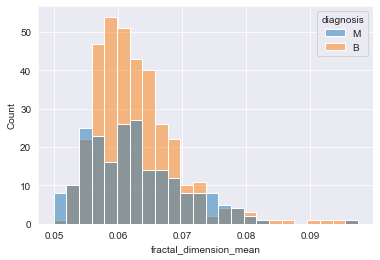

In [254]:
sns.histplot(data = data, x='fractal_dimension_mean', hue='diagnosis')
plt.show()

In [258]:
print(X.shape)
X_new = SelectKBest(score_func=chi2, k = 4).fit_transform(X,y)
print(X_new.shape)

(569, 30)
(569, 4)


##### Ejercicio:
##### Pipeline que sera el resultado de MinMaxScaler + Kbest k=3:6 + Linear Discriminant Analysis

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.pipeline import Pipeline

In [295]:
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

scaler = MinMaxScaler()
selector = SelectKBest(score_func=chi2, k=3) # Solo valores no negativos
algorithm = LinearDiscriminantAnalysis()

In [296]:
pipe = Pipeline([
    ('MinMaxScaler', scaler),
    ('Selector', selector),
    ('Algoritmo', algorithm)
])

In [297]:
pipe.fit(X_train, y_train)
result_3 = pipe.score(X_test, y_test)
print(result_3)

0.9122807017543859


In [288]:
pipe.fit(X_train, y_train)
result_4 = pipe.score(X_test, y_test)
print(result_4)

0.9298245614035088


In [286]:
pipe.fit(X_train, y_train)
result_5 = pipe.score(X_test, y_test)
print(result_5)

0.9298245614035088


In [283]:
pipe.fit(X_train, y_train)
result_6 = pipe.score(X_test, y_test)
print(result_6)

0.9385964912280702


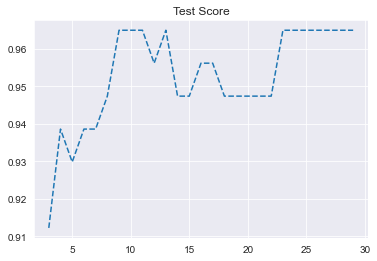

In [322]:
# Otra forma de hacer el pipeline
from sklearn.pipeline import make_pipeline

scores = []

for i in range(3, 30): # Hay 30 columnas
    scaler = MinMaxScaler()
    selector = SelectKBest(score_func=chi2, k=i)
    algorithm = LinearDiscriminantAnalysis()

    pipeline = make_pipeline(scaler, selector, algorithm)

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    scores.append(score)
    
    #print('No Variables ' + str(i+3) +': ' + str(score))

plt.plot(range(3,30), scores, '--')
plt.title('Test Score')
plt.show()

## 5. Feature Importance <a class="anchor" id="Importance"></a>

[0.06505453 0.01794904 0.05667593 0.05711982 0.00937578 0.01866588
 0.0334605  0.08684028 0.0065041  0.00695114 0.02159502 0.00558713
 0.02736723 0.03653022 0.0048894  0.00613827 0.00583404 0.00890098
 0.00527772 0.0063339  0.09278283 0.03124001 0.07857792 0.07876566
 0.01938747 0.02999672 0.04097227 0.11880313 0.01224248 0.01018057]


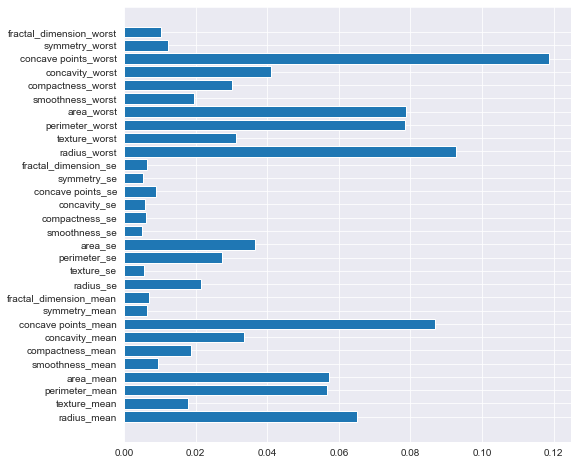

In [327]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

plt.figure(figsize = (8, 8))
plt.barh(y = X.columns, width = model.feature_importances_)
plt.show()

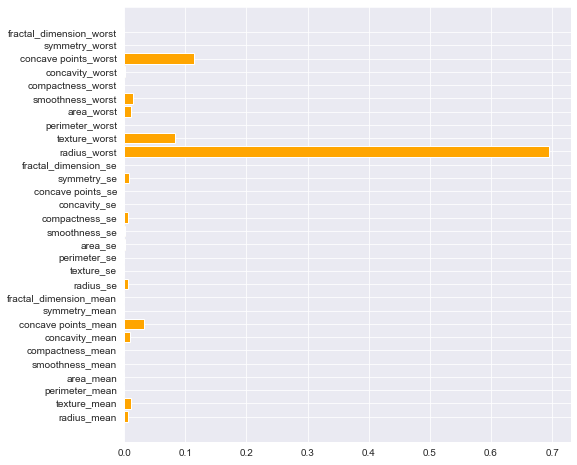

In [328]:
# Probamos otro algoritmo

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)

# print(model.feature_importances_)

plt.figure(figsize = (8, 8))
plt.barh(y = X.columns, width = model.feature_importances_, color = 'orange')
plt.show()

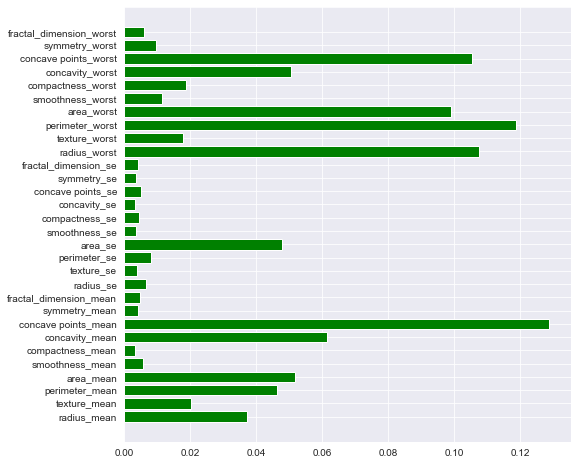

In [329]:
# Probamos otro algoritmo

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)

# print(model.feature_importances_)

plt.figure(figsize=(8, 8))
plt.barh(y=X.columns, width=model.feature_importances_, color = 'green')
plt.show()

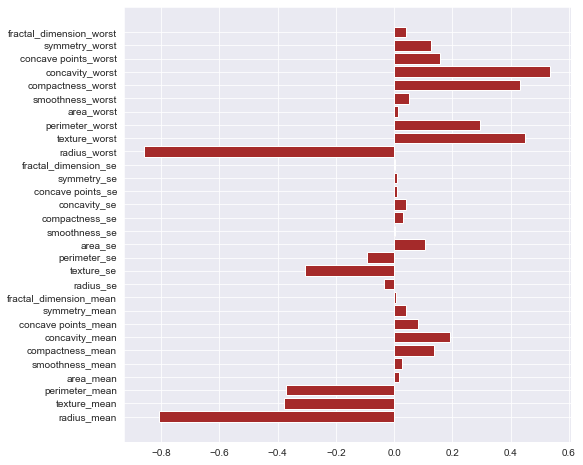

In [343]:
### Regresion

model = LogisticRegression()
model.fit(X,y)
model.coef_[0] # Por los corchetes por el shape del array

""" No Normalizado """

plt.figure(figsize=(8, 8))
plt.barh(y=X.columns, width=model.coef_[0], color = 'brown')
plt.show()

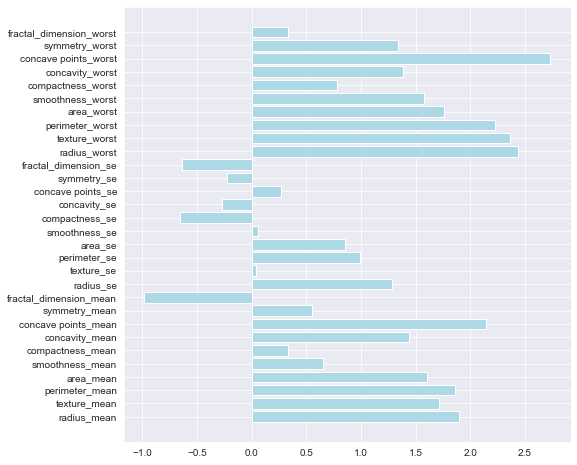

In [347]:
# Vamos a usar una pipeline

algorithm = LogisticRegression()
scaler = MinMaxScaler()
pipeline = make_pipeline(scaler, algorithm)
pipeline.fit(X,y)
algorithm.coef_[0] #El pipeline no tiene coeficientes sino el algoritmo

""" No Normalizado """

plt.figure(figsize=(8, 8))
plt.barh(y=X.columns, width=algorithm.coef_[0], color = 'lightblue')
plt.show()

In [353]:
""" Recursive Feature Selection (RFE) """

from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
result = rfe.fit(X,y)

list(zip(X.columns, result.ranking_, result.support_))


[('radius_mean', 2, False),
 ('texture_mean', 11, False),
 ('perimeter_mean', 21, False),
 ('area_mean', 25, False),
 ('smoothness_mean', 20, False),
 ('compactness_mean', 6, False),
 ('concavity_mean', 5, False),
 ('concave points_mean', 7, False),
 ('symmetry_mean', 9, False),
 ('fractal_dimension_mean', 24, False),
 ('radius_se', 19, False),
 ('texture_se', 1, True),
 ('perimeter_se', 8, False),
 ('area_se', 16, False),
 ('smoothness_se', 27, False),
 ('compactness_se', 14, False),
 ('concavity_se', 15, False),
 ('concave points_se', 22, False),
 ('symmetry_se', 23, False),
 ('fractal_dimension_se', 26, False),
 ('radius_worst', 1, True),
 ('texture_worst', 10, False),
 ('perimeter_worst', 13, False),
 ('area_worst', 18, False),
 ('smoothness_worst', 17, False),
 ('compactness_worst', 1, True),
 ('concavity_worst', 1, True),
 ('concave points_worst', 3, False),
 ('symmetry_worst', 4, False),
 ('fractal_dimension_worst', 12, False)]

In [351]:
result.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False])

In [358]:
# Ejercicio

# Logistic Regression probar rfe con n_features_select=1:10 y hacer plot

from sklearn.feature_selection import RFE
results = []
for i in range(1,10):
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=i)
    rfe.fit_transform(X,y)
    result = rfe.score(X,y)
    results.append(result)

# list(zip(X.columns, result.ranking_, result.support_))

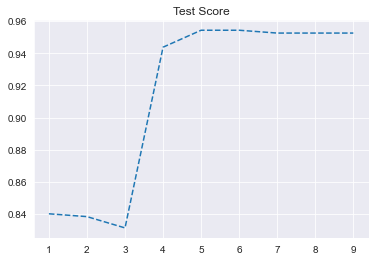

In [359]:
plt.plot(range(1,10), results, '--')
plt.title('Test Score')
plt.show()

In [ ]:
""" PCA """

In [361]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca = pca.fit(X)

pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

In [ ]:
# Ejercicio

#Pipeline, DecisionTree, MinMaxScaler, rfe/kbest/pca comprarlo de 4:6, con train test split

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


In [ ]:
algorithm = LogisticRegression()
scaler = MinMaxScaler()
pipeline = make_pipeline(scaler, selector, algorithm)
pipeline.fit(X,y)
algorithm.coef_[0] #El pipeline no tiene coeficientes sino el algotimo

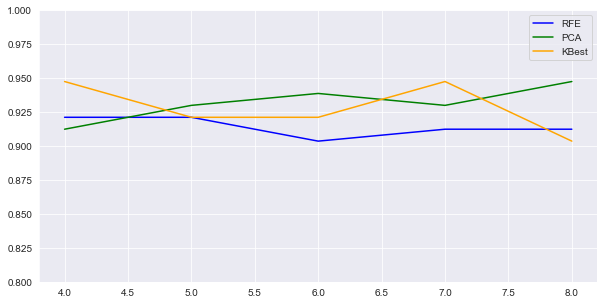

In [370]:
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

algorithm = DecisionTreeClassifier(random_state=99) #Esto es el estimator
scaler = MinMaxScaler()

results_rfe = []
results_pca = []
results_kbest = []

for i in range(4, 9):
    rfe = RFE(algorithm, i)
    pipeline = make_pipeline(scaler, rfe, algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)
    results_rfe.append(results)
    
    pca = PCA(i)
    pipeline = make_pipeline(scaler, pca, algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)
    results_pca.append(results)
    
    kbest = SelectKBest(score_func=chi2, k=i)
    pipeline = make_pipeline(scaler, kbest, algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)    
    results_kbest.append(results)

plt.figure(figsize=(10,5))
plt.plot(range(4,9), results_rfe, label = 'RFE', color = 'blue')
plt.plot(range(4,9), results_pca, label = 'PCA', color = 'green')
plt.plot(range(4,9), results_kbest, label = 'KBest', color = 'orange')
plt.ylim((0.8,1.0))
plt.legend()
plt.show()



.

## 6. Model Validation <a class="anchor" id="Validation"></a>

In [371]:
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict

### 6.1 Train Test Split <a class="anchor" id="TrainTest"></a>

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=33)
model = LogisticRegression()

model.fit(X_train,y_train)
model.score(X_train, y_train)

model.predict(X_test)

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M'],
      dtype=object)

### 6.2 KFold  <a class="anchor" id="KFold"></a>

In [379]:
kfold = KFold(n_splits=10, shuffle=True, random_state=8)
model = LogisticRegression()

results = cross_val_score(model, X, y, cv = kfold)
print(results)

# cross_val_predict(model, X,  y, cv = kfold)

[0.96491228 0.94736842 0.9122807  0.94736842 0.89473684 1.
 0.94736842 0.89473684 0.96491228 0.91071429]


array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [386]:
#Ejercicio:

#Revisar si hay mejoria en Logistic Regression con k = 3, 5 o 10 folds. 

folds = [3,5,10]
results_3 = []
results_5 = []
results_10 = []

for i in folds:
    kfold = KFold(n_splits=i, shuffle=True, random_state=8)
    model = LogisticRegression()
    result = cross_val_score(model, X, y, cv = kfold)
    print(result.mean())


0.9384572542467279
0.9490607048594939
0.9384398496240604


### 6.3 Leave One Out  <a class="anchor" id="LOO"></a>

In [387]:
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, y, cv = loocv)

In [388]:
results

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

94.02460456942003(0.23703041840789138)


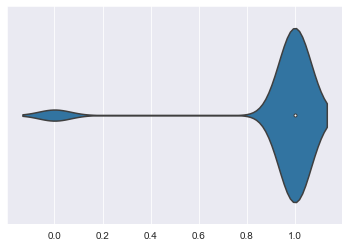

In [392]:
print(str(results.mean()*100) + '(' + str(results.std()) + ')')

sns.violinplot(results)
plt.show()

### 6.4 Shuffle Split <a class="anchor" id="Shuffle"></a>

In [395]:
cv_technique = ShuffleSplit(n_splits=10)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=cv_technique)

print(str(results.mean()*100) + '(' + str(results.std()) + ')')

94.91228070175438(0.030839290932012167)


In [ ]:
#Ejercicios:

# Hacer pipeline que lleve un StandardScaler, que lleve LogisticRegression
# un Cross val entrenado con un Kfolds

97.18671679197995(0.02507588936379938)


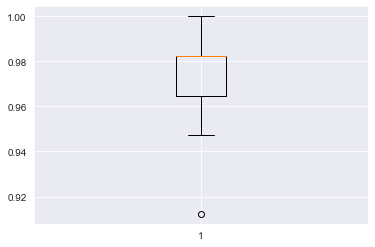

In [397]:
algorithm = LogisticRegression()
kfold = KFold(n_splits=i, shuffle=True, random_state=33)
scaler = StandardScaler()

pipeline = make_pipeline(scaler, algorithm)
results = cross_val_score(pipeline, X, y, cv = kfold)

print(str(results.mean()*100) + '(' + str(results.std()) + ')')

plt.boxplot(results)
plt.show()

##### Ejercicio:
- Mismo problema que antes pero comparando los algoritmos del tema 1:

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = []
models.append( ('LR', LogisticRegression()) )
models.append( ('DTC', DecisionTreeClassifier()) )
models.append( ('KNN', KNeighborsClassifier()) )
models.append( ('LDA', LinearDiscriminantAnalysis()) )
models.append( ('NB', GaussianNB()) )
models.append( ('RFC', RandomForestClassifier()) )
models.append( ('SVF', SVC()) )


LR:0.9770676691729323 + 0.01960702423304285
DTC:0.936654135338346 + 0.02143269317963929
KNN:0.9647869674185463 + 0.019449412820117928
LDA:0.9577694235588974 + 0.021222388151626522
NB:0.9314223057644112 + 0.02294399038680951
RFC:0.9630325814536341 + 0.01854678926564162
SVF:0.975344611528822 + 0.021179450977869375


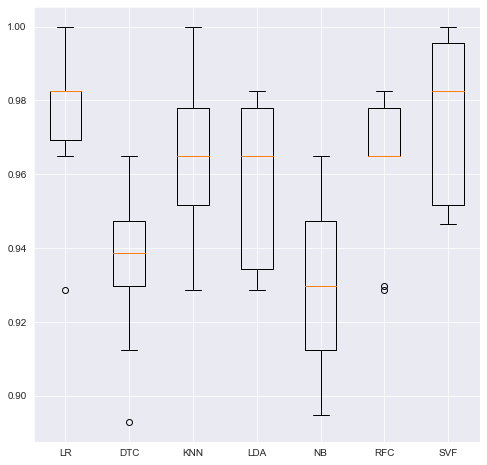

In [418]:
cv_results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=99)
    scaler = StandardScaler()
    pipeline = make_pipeline(scaler, model)
    results = cross_val_score(pipeline, X, y, cv = kfold)
    cv_results.append(results)
    names.append(name)

    print(name + ':' + str(results.mean()) + ' ' + '+' + ' ' + str(results.std()) ) #Construccion mia

plt.figure(figsize=(8,8))
plt.boxplot(cv_results)
plt.xticks(range(1, len(names)+1), names)
plt.show()

## 7. Metricas <a class="anchor" id="Metricas"></a>

In [419]:
model = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=88)
    
cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

array([0.92982456, 0.96491228, 0.98245614, 0.87719298, 0.96491228,
       0.92982456, 0.87719298, 0.98245614, 0.96491228, 0.96428571])

In [420]:
cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss')

array([-0.19794754, -0.12092655, -0.06808487, -0.33862874, -0.0848977 ,
       -0.20084418, -0.19967305, -0.04468063, -0.09855639, -0.09929063])

In [421]:
cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

array([0.97432432, 0.99168975, 1.        , 0.9488491 , 0.9974026 ,
       0.98015873, 0.99876543, 1.        , 0.99744246, 0.99698341])

##### Ejercicio:
- Entrenar el pipeline anterior con distintas metricas y con todos los modelos

LR:0.887531328320802 + 0.02952617368018818
DTC:0.8752192982456141 + 0.042573804798635484
KNN:0.875187969924812 + 0.04680480484922342
LDA:0.862844611528822 + 0.05390689203700337
NB:0.8822368421052632 + 0.03770463301199742
RFC:0.8840225563909773 + 0.03854931734515168
SVF:0.9032894736842104 + 0.03798926744972289


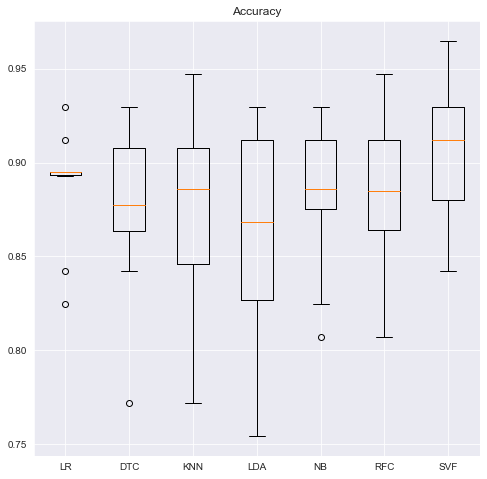

LR:-0.25976938293939533 + 0.06988937707217673
DTC:-4.431007787982616 + 1.5092683916853078
KNN:-1.3983224219289216 + 0.8353709631268098
LDA:-0.2915864360107928 + 0.0957274993272586
NB:-0.27628912198191063 + 0.07610347109201789
RFC:-0.5527950436112492 + 0.5491586804537423
SVF:nan + nan


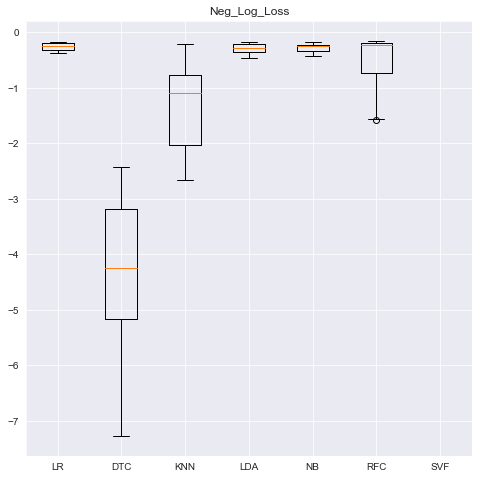

LR:0.9531139132751585 + 0.03291210183352074
DTC:0.8633482089124671 + 0.05104662746166873
KNN:0.91961015118434 + 0.04448540802875406
LDA:0.9532397484797179 + 0.03320520253221429
NB:0.9477097196850235 + 0.03267982668349342
RFC:0.9434442527309376 + 0.041940371493745264
SVF:0.9470658809623405 + 0.04455029887199668


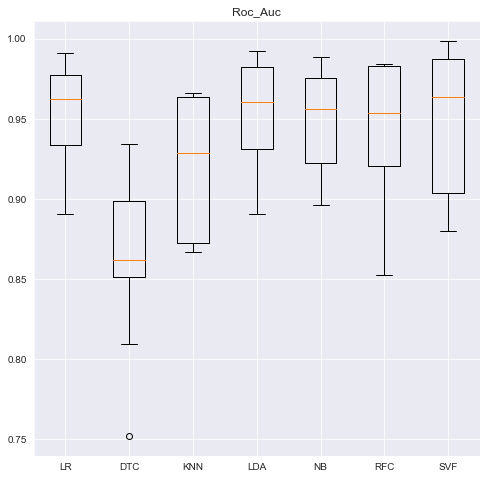

In [456]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = []
models.append( ('LR', LogisticRegression()) )
models.append( ('DTC', DecisionTreeClassifier()) )
models.append( ('KNN', KNeighborsClassifier()) )
models.append( ('LDA', LinearDiscriminantAnalysis()) )
models.append( ('NB', GaussianNB()) )
models.append( ('RFC', RandomForestClassifier()) )
models.append( ('SVF', SVC()) )

scorings = ['accuracy', 'neg_log_loss', 'roc_auc']

for scoring in scorings:
    cv_results = []
    names = []
    for name, model in models:
        
        scaler = StandardScaler()
        pipeline = make_pipeline(scaler, model)
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=99)
        results = cross_val_score(pipeline, X, y, cv = kfold, scoring = scoring)
        
        cv_results.append(results)
        names.append(name)

        print(name + ':' + str(results.mean()) + ' ' + '+' + ' ' + str(results.std()) ) #Construccion mia

    plt.figure(figsize=(8,8))
    plt.title(scoring.title())
    plt.boxplot(cv_results)
    plt.xticks(range(1, len(names)+1), names)
    plt.show()



In [443]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=33)
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)
results = classification_report(y_test, y_pred)
print(results)

results = confusion_matrix(y_test, y_pred)
print(results)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

              precision    recall  f1-score   support

           B       0.93      0.96      0.94        89
           M       0.92      0.89      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

[[85  4]
 [ 6 48]]
85 4 6 48


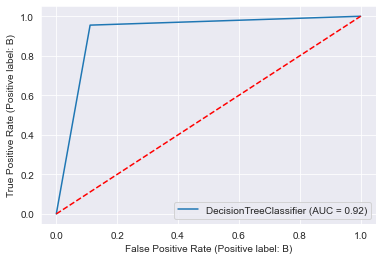

In [444]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test, pos_label='B')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.show()

## 8. Seleccion de Algoritmos <a class="anchor" id="Seleccion"></a>

In [ ]:
#Ya los hemos visto con anterioridad

## 9. Model Tuning <a class="anchor" id="Tuning"></a>

In [445]:
from sklearn.model_selection import GridSearchCV

In [447]:
algorithm = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 10]}

In [451]:
model = GridSearchCV(estimator = algorithm, param_grid=param_grid)
model.fit(X,y)

print(model.best_score_)
print(model.best_estimator_)

0.9332557056357709
DecisionTreeClassifier(criterion='entropy', max_depth=3)
